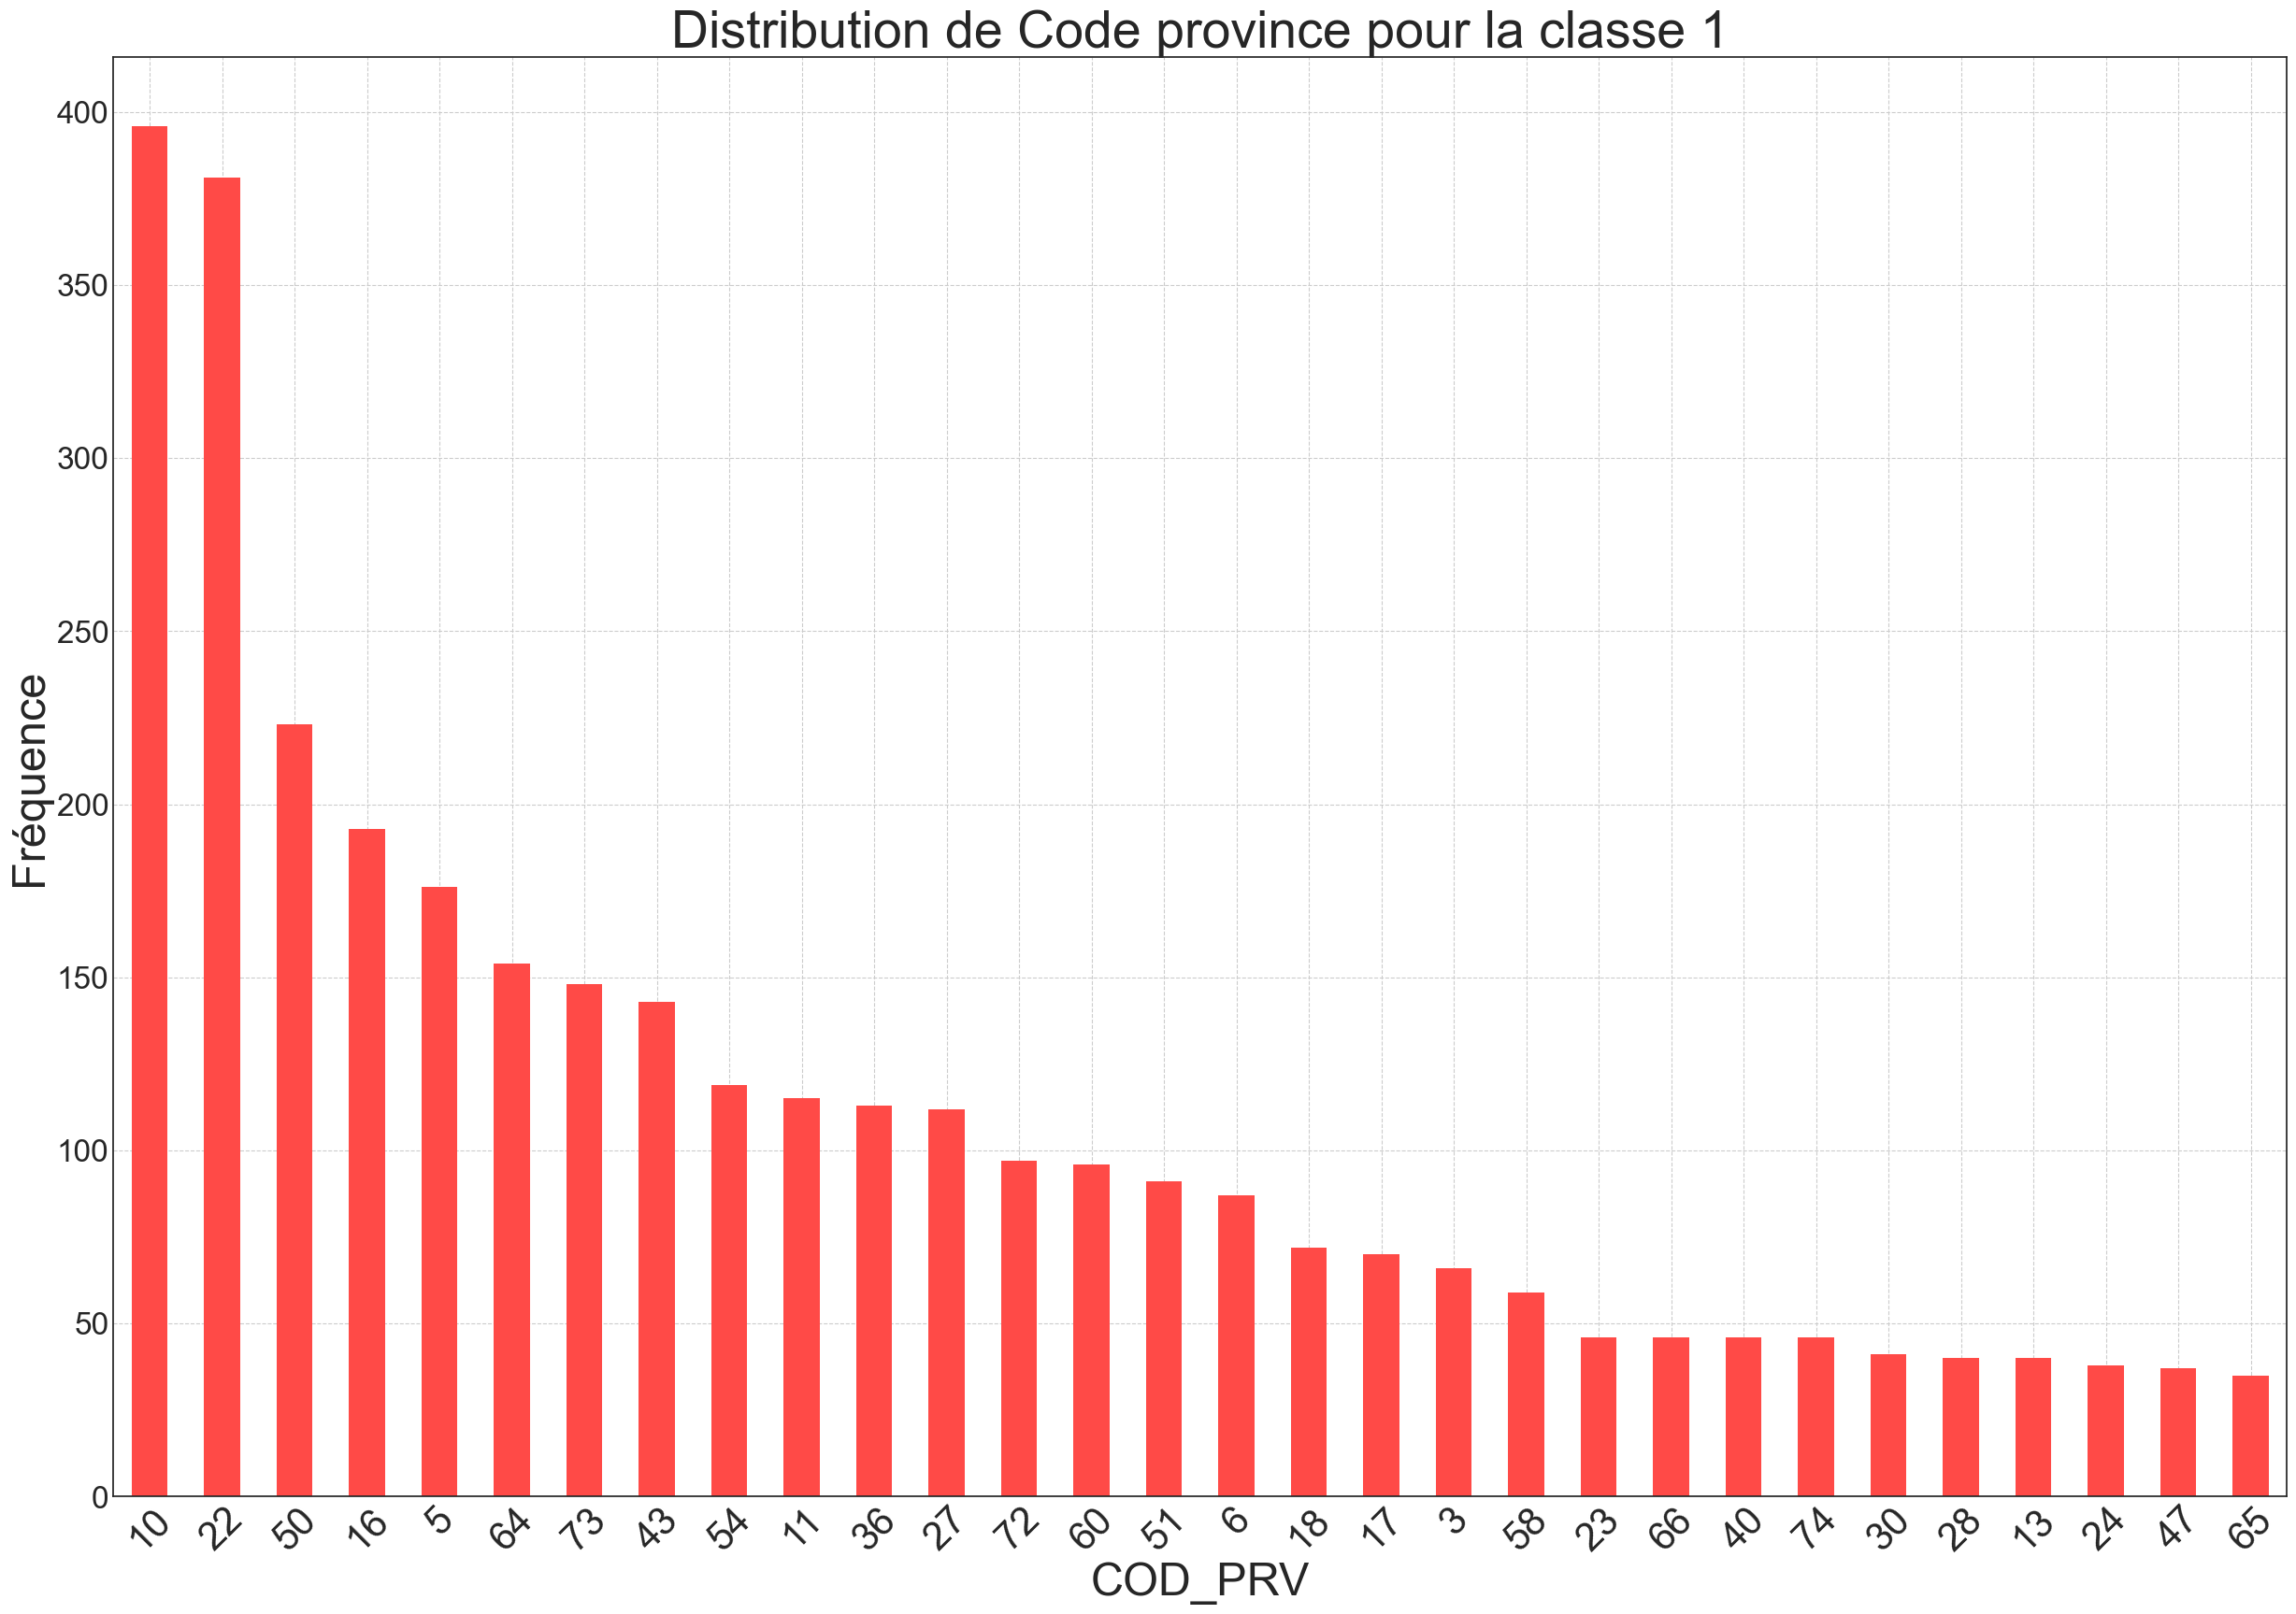

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('RFC_CLASSISR_2205.csv')
classe_1_df = df[df['Predicted_CLASSE_ISR'] == 1]
category_counts = classe_1_df['COD_PRV'].value_counts().head(30)
plt.style.use('seaborn-white')
plt.figure(figsize=(30, 20))
category_counts.plot(kind='bar', color='#ff4a47', edgecolor='none')
plt.title('Distribution de Code province pour la classe 1', fontsize=40)
plt.xlabel('COD_PRV', fontsize=35)
plt.ylabel('Fréquence', fontsize=35)
plt.xticks(rotation=45, fontsize=30)
plt.yticks(fontsize=24)
plt.grid(True, which='both', linestyle='--', linewidth=0.8)
plt.show()


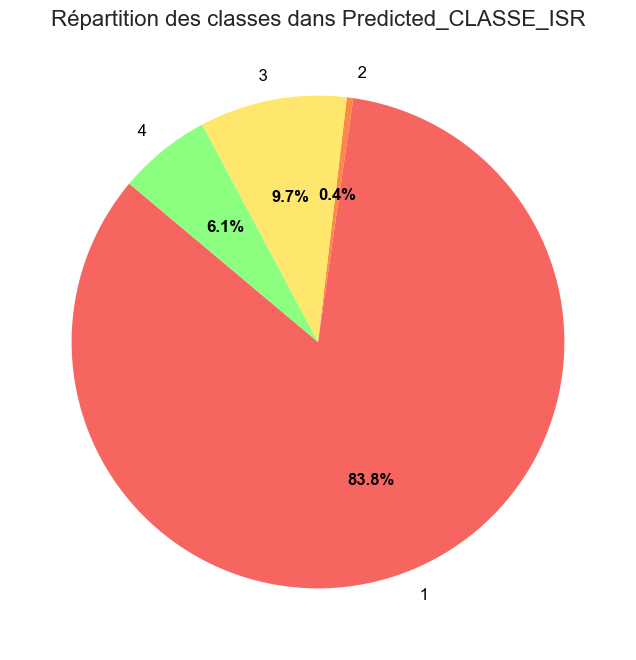

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Model_rfc_eljadida.csv')
if 'Predicted_CLASSE_ISR' in df.columns:
    rate = df['Predicted_CLASSE_ISR'].value_counts(normalize=True).sort_index()
    expected_categories = {1, 2, 3, 4}
    actual_categories = set(rate.index)
    missing_categories = expected_categories - actual_categories
    for category in missing_categories:
        rate[category] = 0
    rate = rate.sort_index()
    colors = ['#f76560', '#ff8847', '#ffe76e', '#8cff80']
    fig, ax = plt.subplots(figsize=(10, 8))
    wedges, texts, autotexts = ax.pie(rate, labels=[f' {i}' for i in rate.index],
                                      autopct='%1.1f%%', startangle=140, colors=colors,
                                      textprops={'fontsize': 12, 'color': 'black'})
    plt.setp(texts, size=12)
    plt.setp(autotexts, size=12, color="black", weight="bold")
    plt.title('Répartition des classes dans Predicted_CLASSE_ISR', fontsize=16)
    ax.set_ylabel('')
    plt.show()

else:
    print("The column 'Predicted_CLASSE_ISR' does not exist in the DataFrame.")



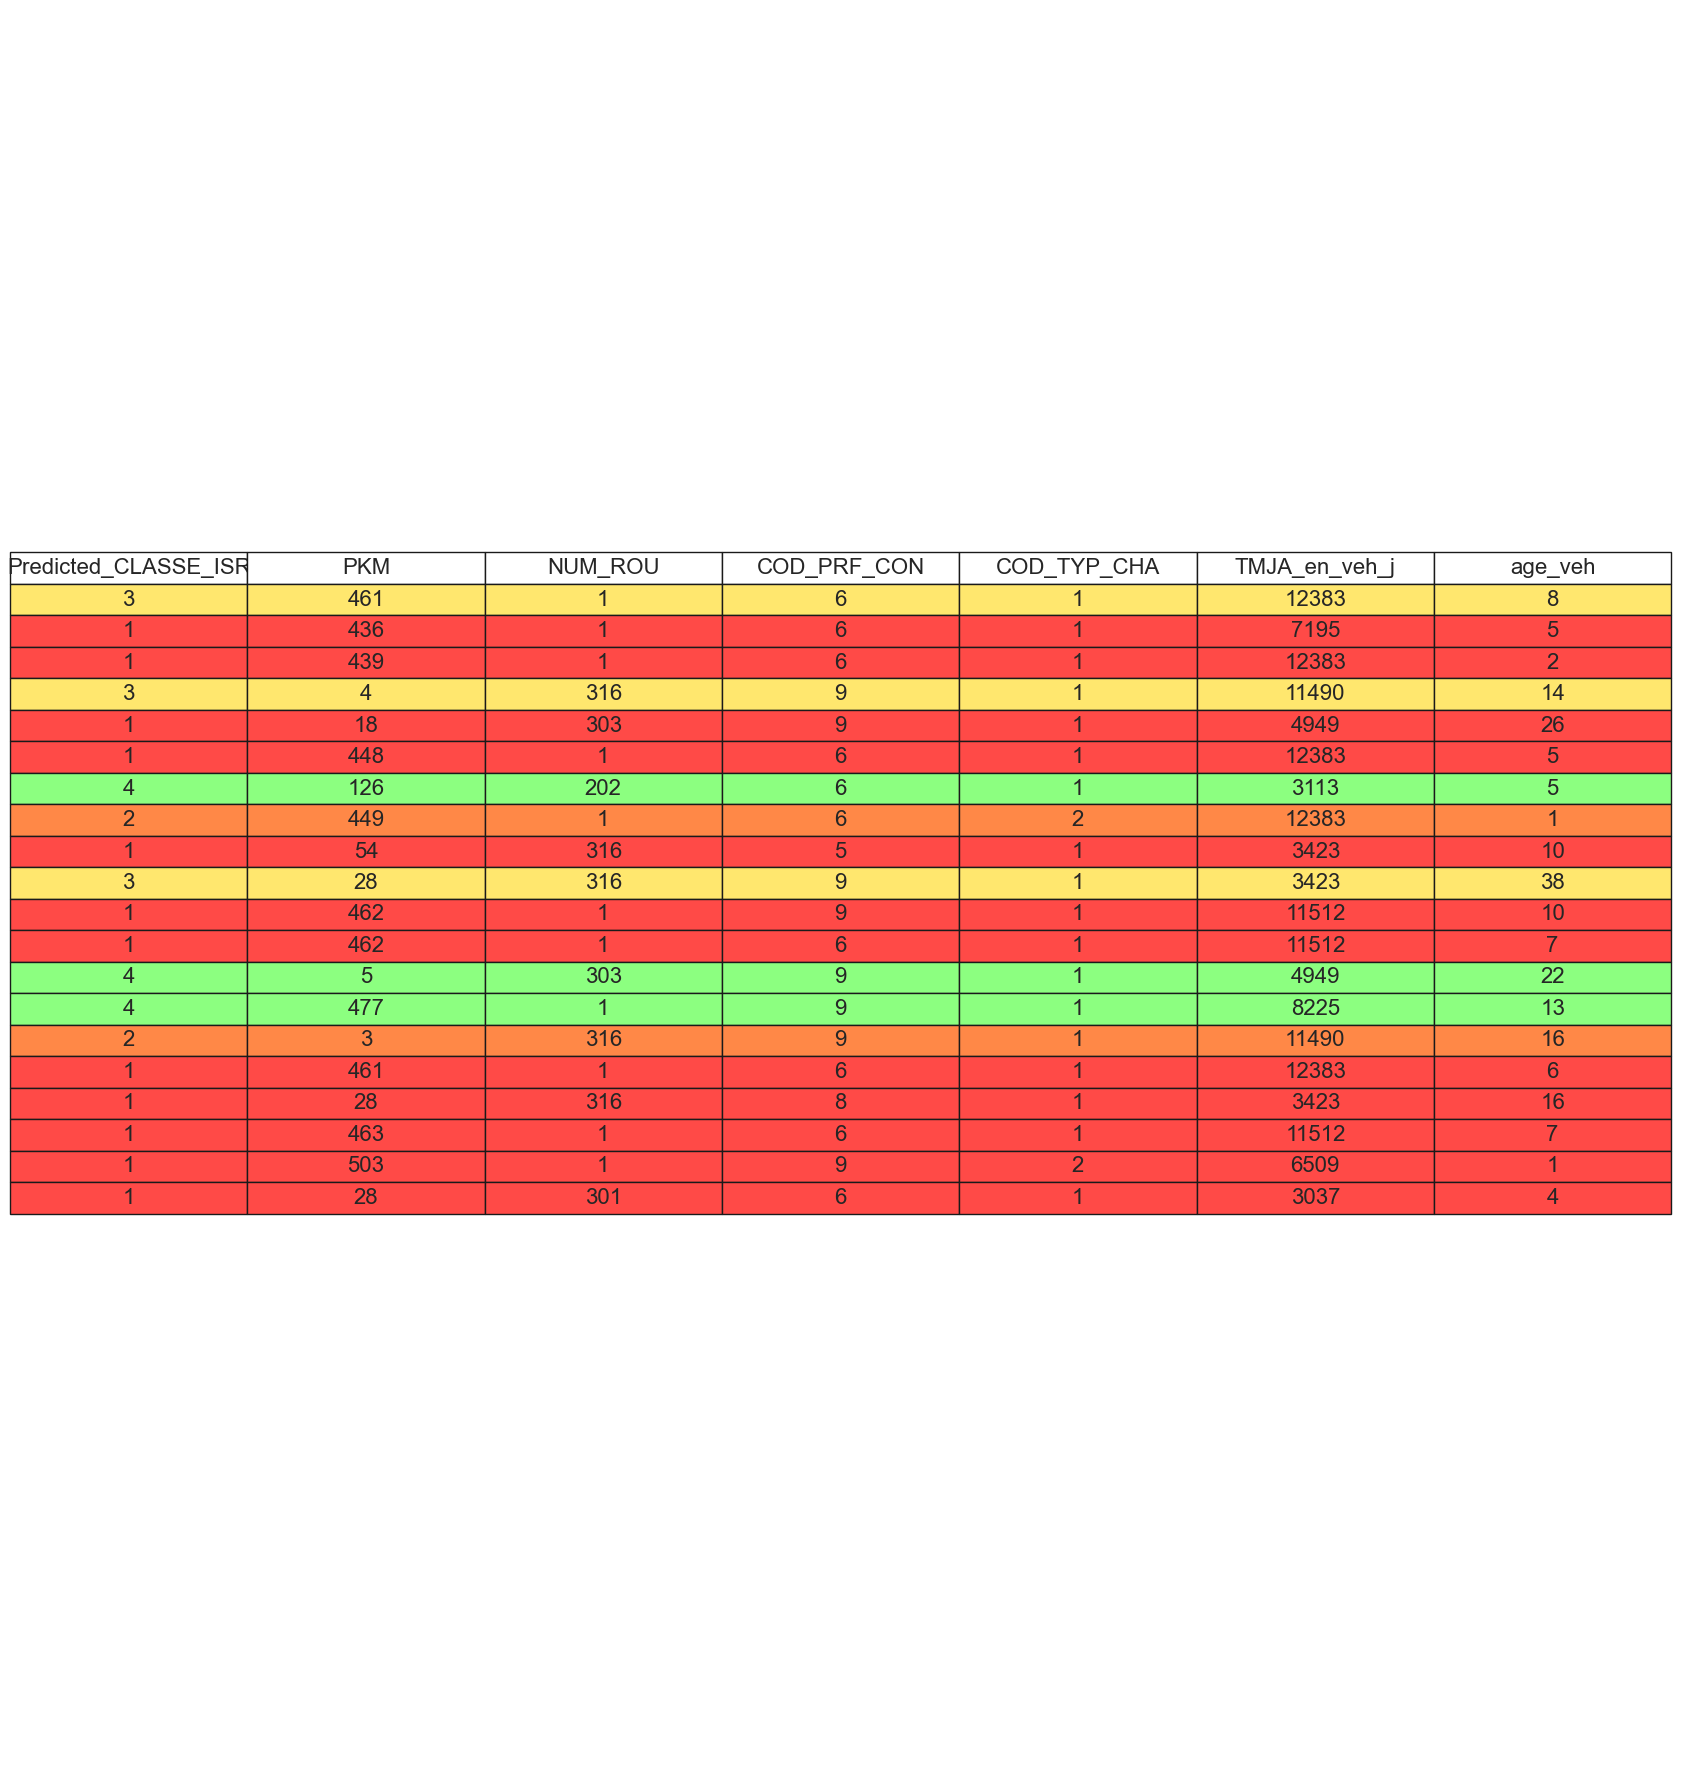

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Model_rfc_eljadida.csv')
columns_to_keep = ['PKM', 'NUM_ROU', 'COD_PRF_CON', 'COD_TYP_CHA', 'TMJA_en_veh_j', 'age_veh']
df = df[columns_to_keep]

# Check if there are enough rows
if df.shape[0] < 20:
    print("Le DataFrame contient moins de 20 lignes. Veuillez ajuster ou ajouter plus de données.")
else:
    df = df.iloc[:20]  # Use only the first 20 rows for clarity

    # Prepare class distribution as per the requirement
    classes = [1] * (20 - (2 + 3 + 3))  # Fill the rest with class 1
    classes += [2] * 2  # 2 instances of class 2
    classes += [3] * 3  # 3 instances of class 3
    classes += [4] * 3  # 3 instances of class 4
    np.random.shuffle(classes)  # Shuffle the classes to distribute randomly
    df['Predicted_CLASSE_ISR'] = classes

    # Ensure 'Predicted_CLASSE_ISR' is the first column
    col_order = ['Predicted_CLASSE_ISR'] + [col for col in df if col != 'Predicted_CLASSE_ISR']
    df = df[col_order]

    # Define colors for classes
    def couleur_classe_isr(valeur):
        return ['#ff4a47', '#ff8847', '#ffe76e', '#8cff80'][valeur-1]
    couleurs = df['Predicted_CLASSE_ISR'].map(couleur_classe_isr)
    cell_colours = [[color] * len(df.columns) for color in couleurs]
    fig, ax = plt.subplots(figsize=(20, 18))  # Large figure size to enhance readability
    the_table = plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center',
                          cellColours=cell_colours, colWidths=[0.15]*len(df.columns))
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(16)  # Large font size for easy reading
    the_table.scale(1.5, 1.5)  # Scale the table to make it fit better
    ax.axis('off')
    ax.set_frame_on(False)

    plt.tight_layout()
    plt.savefig('tableau_visualisation.png', dpi=300)  # Save the table as a high-resolution image
    plt.show()


## caractéristiques sur le Conducteur

<Figure size 1200x800 with 0 Axes>

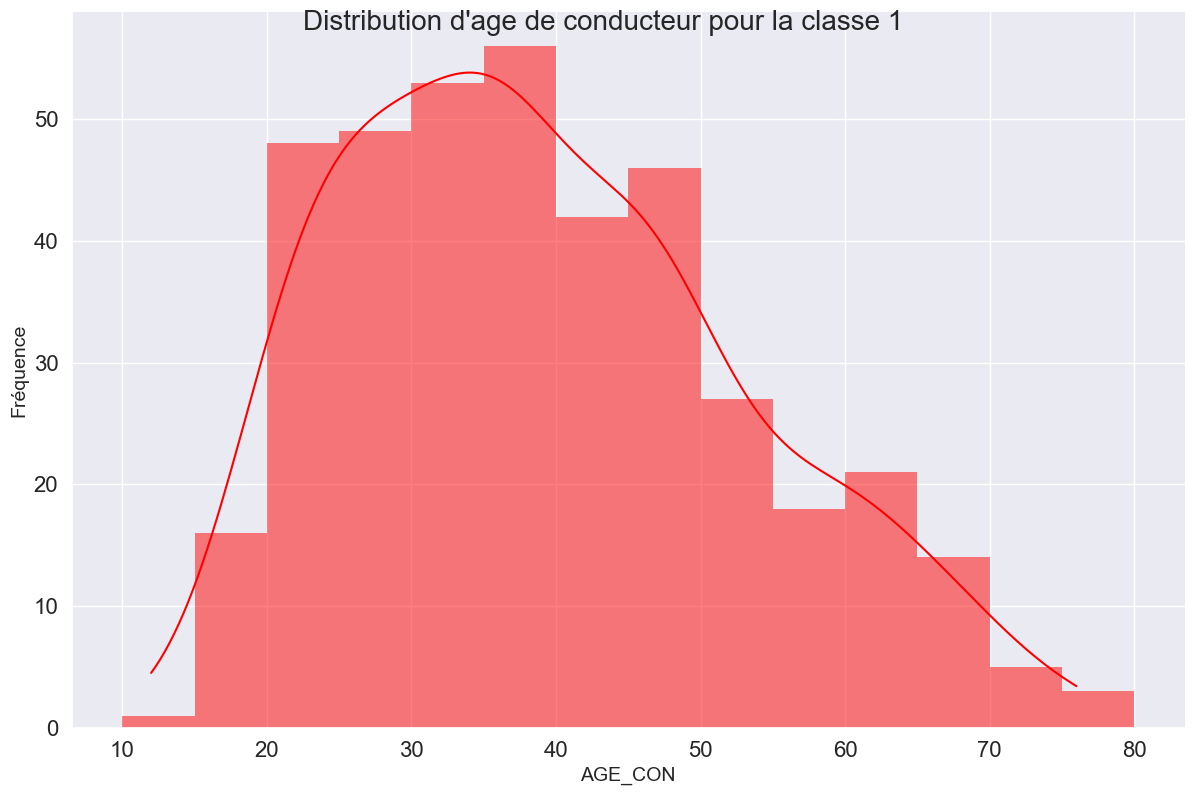

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Model_rfc_eljadida.csv')
classe_1_df = df[df['Predicted_CLASSE_ISR'] == 1]
classe_1_df = classe_1_df.dropna(subset=['AGE_CON'])
max_age = classe_1_df['AGE_CON'].max()
bin_edges = np.arange(10, max_age + 5, 5)  
plt.figure(figsize=(12, 8)) 
plot = sns.displot(classe_1_df['AGE_CON'], kde=True, bins=bin_edges, color='red', edgecolor='none', height=8, aspect=1.5)
plot.set_titles("Distribution de AGE_CON pour la classe 1")
plot.set_axis_labels('AGE_CON', 'Fréquence')
plot.fig.suptitle("Distribution d'age de conducteur pour la classe 1", fontsize=20) 
plt.xlabel('AGE_CON', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)  

plt.show()



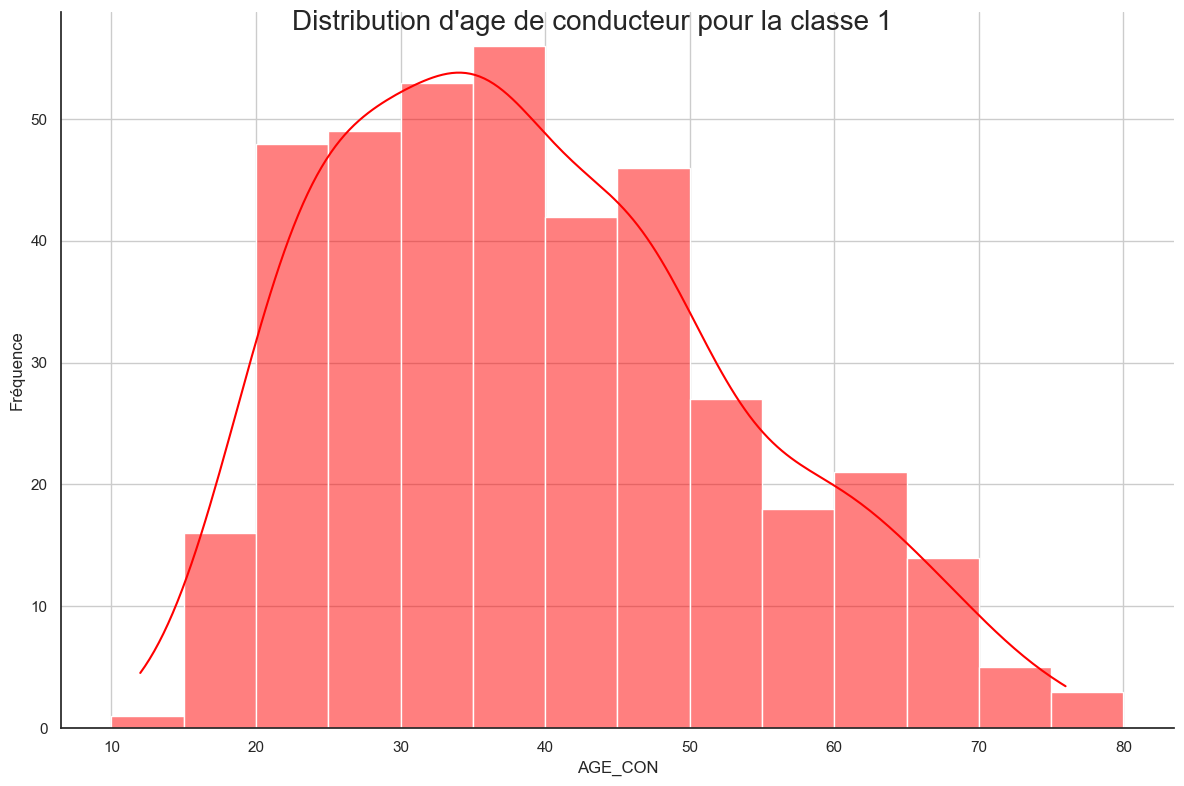

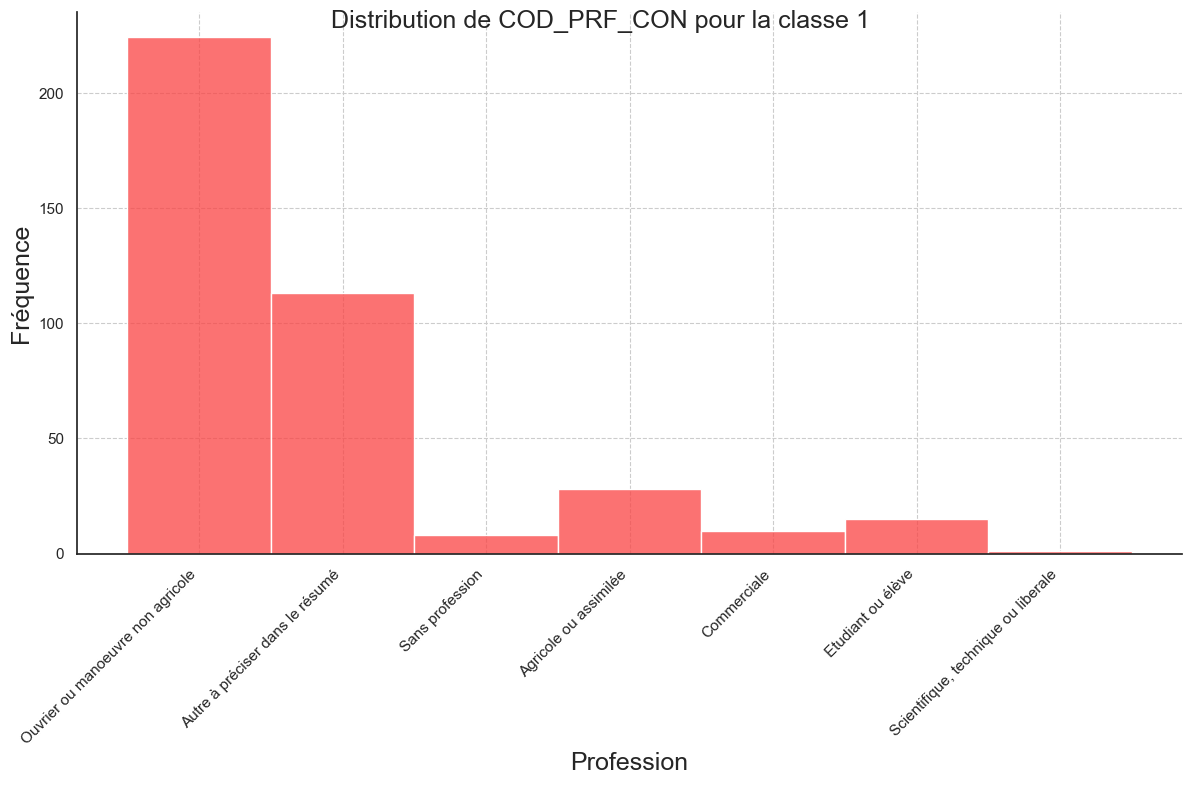

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Model_rfc_eljadida.csv')

classe_1_df = df[df['Predicted_CLASSE_ISR'] == 1]
classe_1_df = classe_1_df.dropna(subset=['AGE_CON'])

code_descriptions = {
    1: 'Scientifique, technique ou liberale',
    2: 'Commerciale',
    3: 'Directeur ou cadre administratif',
    4: 'Travailleur spécialisé dans les services',
    5: 'Agricole ou assimilée',
    6: 'Ouvrier ou manoeuvre non agricole',
    7: 'Etudiant ou élève',
    8: 'Sans profession',
    9: 'Autre à préciser dans le résumé'
}
classe_1_df['COD_PRF_CON'] = classe_1_df['COD_PRF_CON'].map(code_descriptions)

sns.set_theme(style="white")

max_age = classe_1_df['AGE_CON'].max()
bin_edges = np.arange(10, max_age + 5, 5)
age_plot = sns.displot(classe_1_df['AGE_CON'], kde=True, bins=bin_edges, color='red', height=8, aspect=1.5)
age_plot.set_titles("Distribution de AGE_CON pour la classe 1")
age_plot.set_axis_labels('AGE_CON', 'Fréquence')
age_plot.fig.suptitle("Distribution d'age de conducteur pour la classe 1", fontsize=20)
plt.grid(True)

prof_plot = sns.displot(data=classe_1_df, x='COD_PRF_CON', color='#fa4343', height=8, aspect=1.5)
prof_plot.set_xticklabels(rotation=45, horizontalalignment='right')
prof_plot.fig.subplots_adjust(bottom=0.3)
prof_plot.set_titles("Distribution de COD_PRF_CON pour la classe 1")
prof_plot.set_axis_labels('Profession', 'Fréquence', fontsize=18)
prof_plot.fig.suptitle('Distribution de COD_PRF_CON pour la classe 1', fontsize=18)
plt.grid(True, which='both', linestyle='--', linewidth=0.8)

plt.show()

## Etat de vehicule+conditions sur la vehicule

C:\Users\pc\AppData\Local\Temp\ipykernel_2752\1956573042.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classe_1_df[column] = classe_1_df[column].map(mapping).fillna('Non classifié')
C:\Users\pc\AppData\Local\Temp\ipykernel_2752\1956573042.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classe_1_df['Reclassified_COD_TYP_VEH'] = classe_1_df['Type_veh'].apply(reclassify_typ_veh)
C:\Users\pc\AppData\Local\Temp\ipykernel_2752\1956573042.py:54: SettingWithCopyWarning: 
A value is trying to be set on a

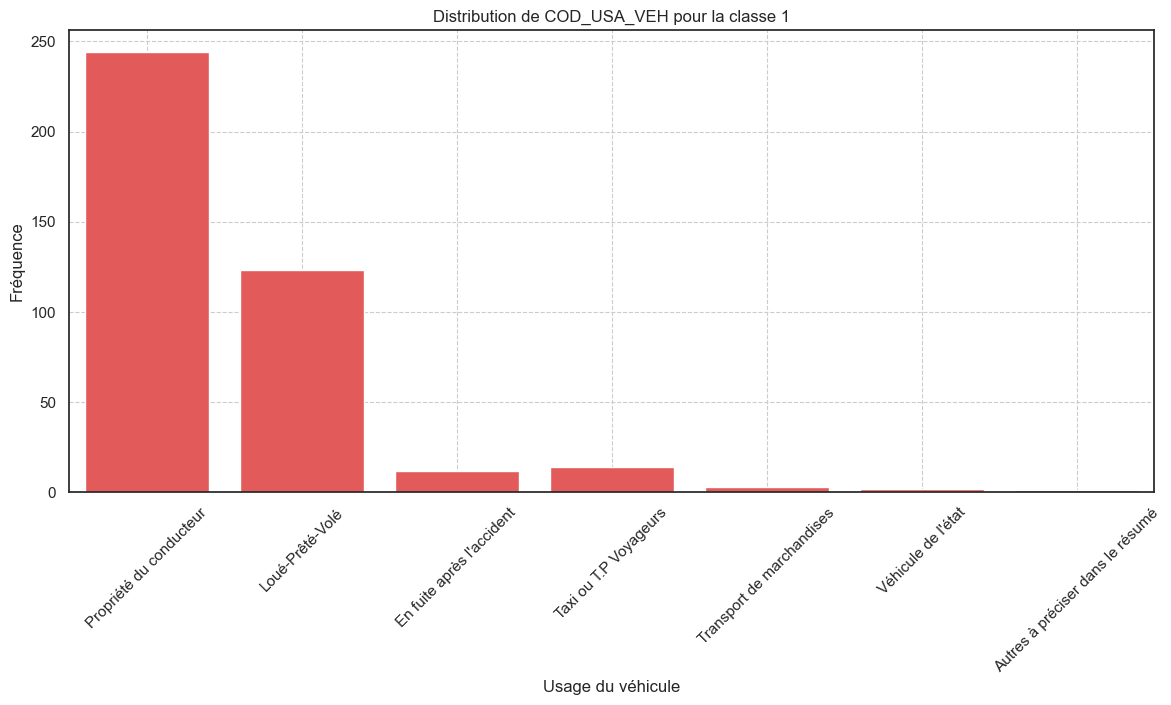

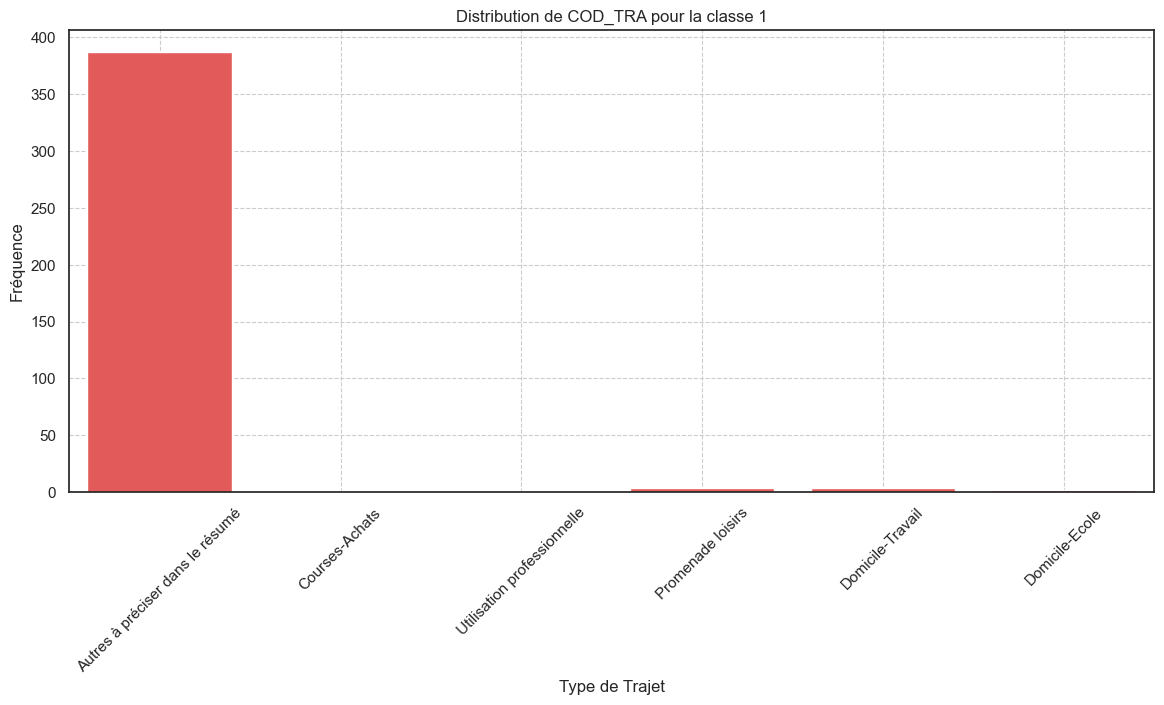

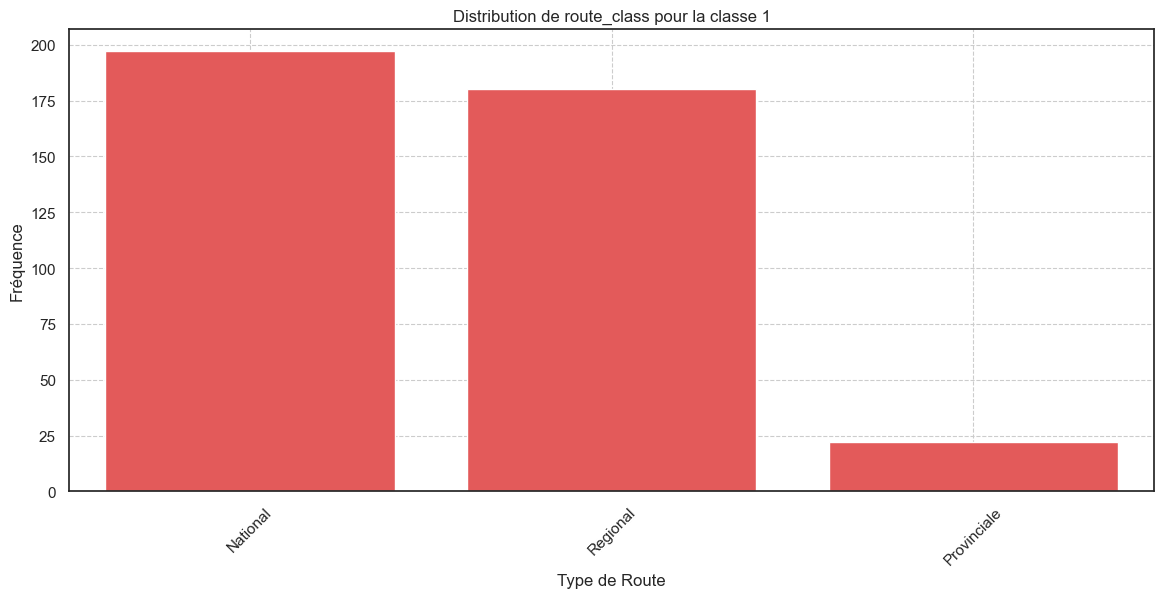

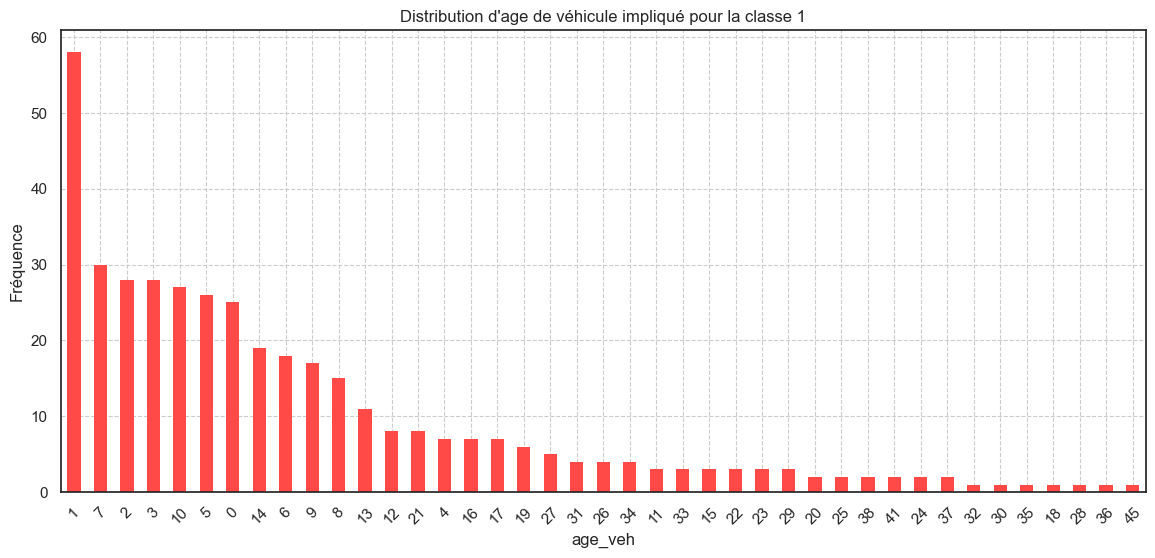

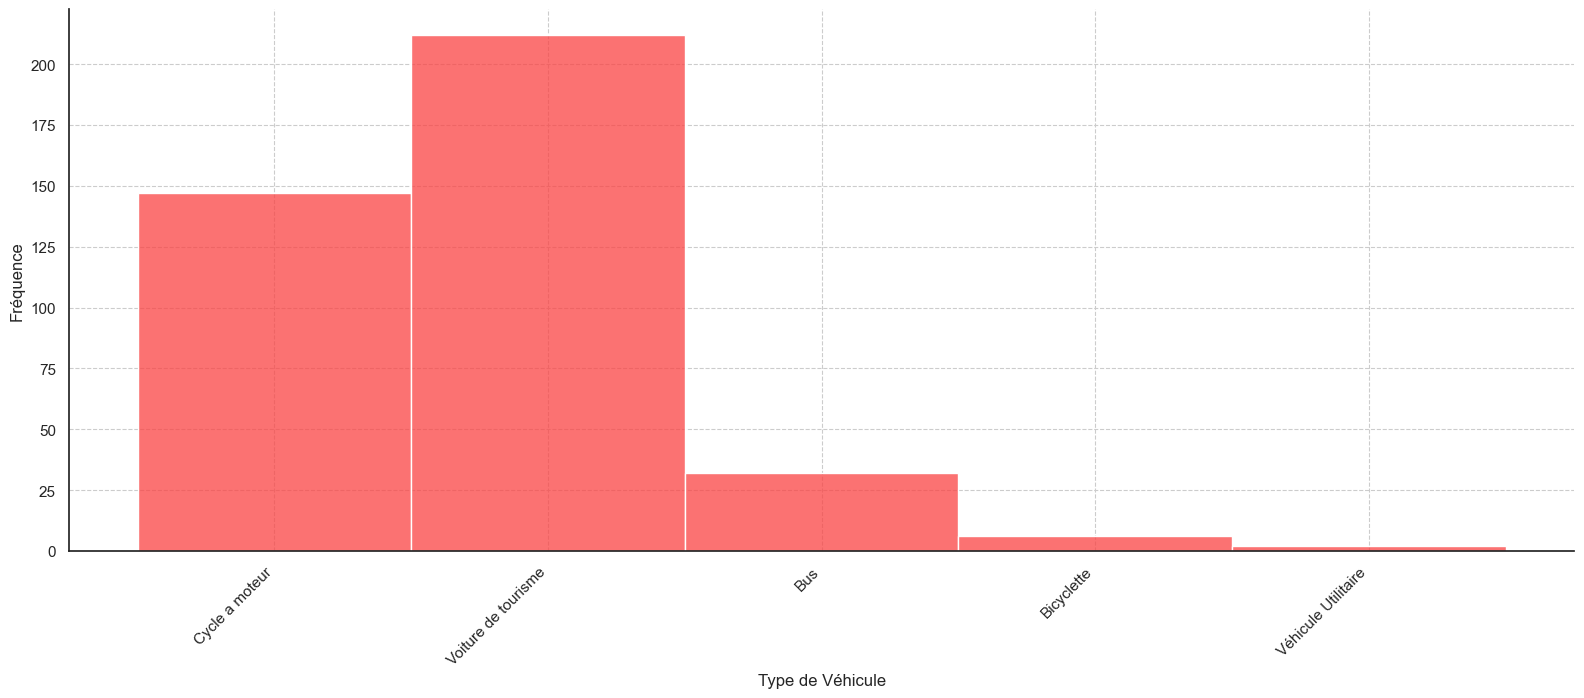

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Model_rfc_eljadida.csv')
classe_1_df = df[df['Predicted_CLASSE_ISR'] == 1]

mappings = {
    'COD_USA_VEH': {
        0: 'Propriété du conducteur',
        1: 'Taxi ou T.P Voyageurs',
        2: 'Transport de marchandises',
        3: 'Véhicule de l\'état',
        4: 'Loué-Prêté-Volé',
        5: 'En fuite après l\'accident',
        9: 'Autres à préciser dans le résumé'
    },
    'COD_TRA': {
        0: 'Domicile-Travail',
        1: 'Domicile-Ecole',
        2: 'Courses-Achats',
        3: 'Utilisation professionnelle',
        4: 'Promenade loisirs',
        9: 'Autres à préciser dans le résumé'
    },
    'route_class': {
        1: 'National',
        2: 'Regional',
        3: 'Provinciale',
        4: 'Autoroute'
    }
}

for column, mapping in mappings.items():
    classe_1_df[column] = classe_1_df[column].map(mapping).fillna('Non classifié')

def reclassify_typ_veh(code):
    categories = {0: 0, 1: 1, 15: 1, 3: 3, 4: 2, 5: 2, 6: 6, 7: 4, 8: 4,
                  2: 5, 9: 5, 10: 5, 11: 5, 12: 5, 13: 5, 14: 5, 99: 99}
    return categories.get(code, 99)

classe_1_df['Reclassified_COD_TYP_VEH'] = classe_1_df['Type_veh'].apply(reclassify_typ_veh)

veh_descriptions = {
    0: 'Bicyclette',
    1: 'Cycle a moteur',
    2: 'Bus',
    3: 'Voiture de tourisme',
    4: 'PL Véhicules',
    5: 'Autres véhicules',
    6: 'Véhicule Utilitaire',
    99: 'Autres à préciser'
}
classe_1_df['Reclassified_COD_TYP_VEH'] = classe_1_df['Reclassified_COD_TYP_VEH'].map(veh_descriptions)

sns.set_theme(style="white")

def create_plot(data, column, title, xlabel):
    plt.figure(figsize=(14, 6))
    sns.countplot(data=data, x=column, color='#fa4343')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Fréquence')
    plt.xticks(rotation=45)
    plt.grid(True, which='both', linestyle='--', linewidth=0.8)
    plt.show()

create_plot(classe_1_df, 'COD_USA_VEH', "Distribution de COD_USA_VEH pour la classe 1", 'Usage du véhicule')
create_plot(classe_1_df, 'COD_TRA', "Distribution de COD_TRA pour la classe 1", 'Type de Trajet')
create_plot(classe_1_df, 'route_class', "Distribution de route_class pour la classe 1", 'Type de Route')

category_counts = classe_1_df['age_veh'].value_counts()
plt.figure(figsize=(14, 6))
category_counts.plot(kind='bar', color='#ff4a47', edgecolor='none')
plt.title("Distribution d'age de véhicule impliqué pour la classe 1")
plt.xlabel('age_veh')
plt.ylabel('Fréquence')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.8)
plt.show()

plot = sns.displot(data=classe_1_df, x='Reclassified_COD_TYP_VEH', color='#fa4343', height=8, aspect=2)
plot.set_xticklabels(rotation=45, horizontalalignment='right')
plot.fig.subplots_adjust(bottom=0.3)
plot.set_titles("Distribution de Typologie de Véhicule pour la classe 1")
plot.set_axis_labels('Type de Véhicule', 'Fréquence')
plt.grid(True, which='both', linestyle='--', linewidth=0.8)
plt.show()


## condition metrologique et ciconstance d'accident

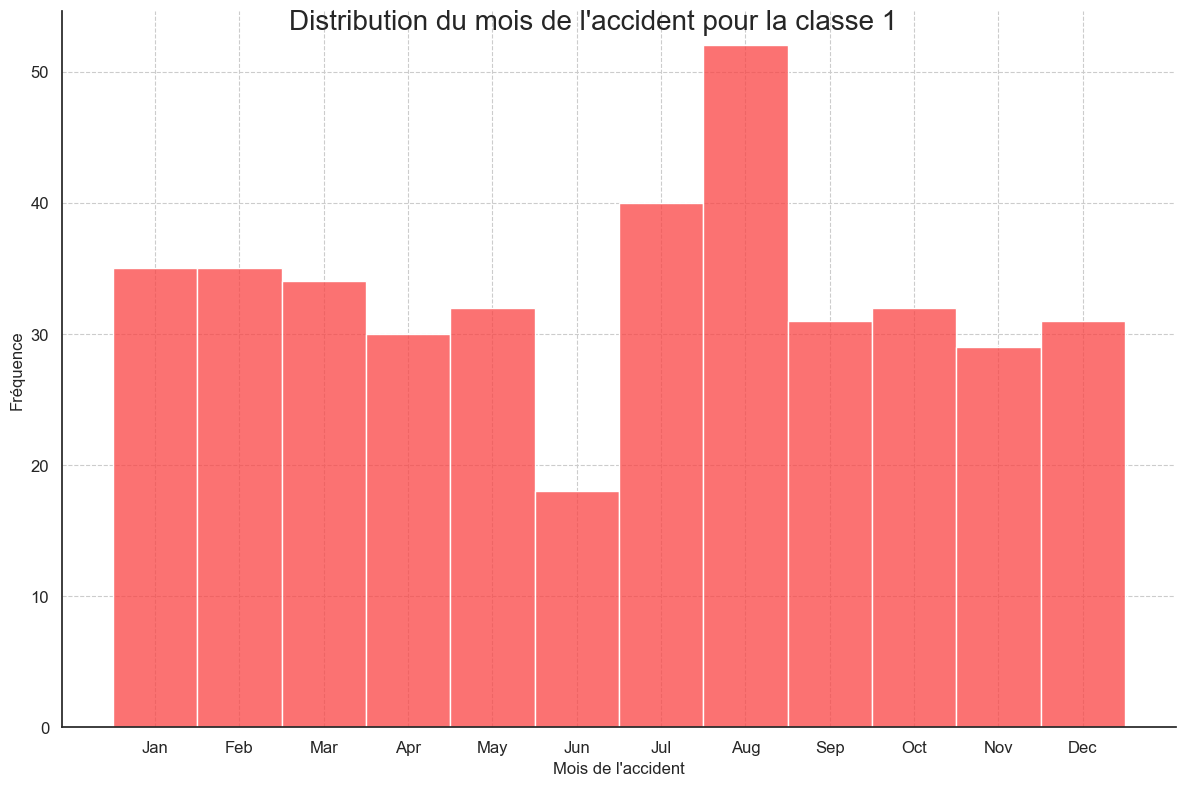

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv('Model_rfc_eljadida.csv')

# Filter for class 1 and remove NaN values in 'MOIS_ACC'
classe_1_df = df[df['Predicted_CLASSE_ISR'] == 1].dropna(subset=['MOIS_ACC'])

# Since 'MOIS_ACC' is a month indicator, it should have values from 1 to 12.
# Define bin edges from just below 1 to just above 12 to properly visualize the data.
bin_edges = np.arange(0.5, 13.5, 1)  # This creates bins centered on each month.

# Using sns.displot to plot the histogram
plot = sns.displot(classe_1_df['MOIS_ACC'], bins=bin_edges,  color='#fa4343', height=8, aspect=1.5)
plot.fig.suptitle("Distribution du mois de l'accident pour la classe 1", fontsize=20)
plot.set(xlabel='Mois de l\'accident', ylabel='Fréquence')
plot.set_titles("Distribution de MOIS_ACC pour la classe 1")

# Adjusting the plot to improve legibility
plt.xticks(np.arange(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], fontsize=12)  # Setting custom month labels for clarity
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.8)
plt.show()


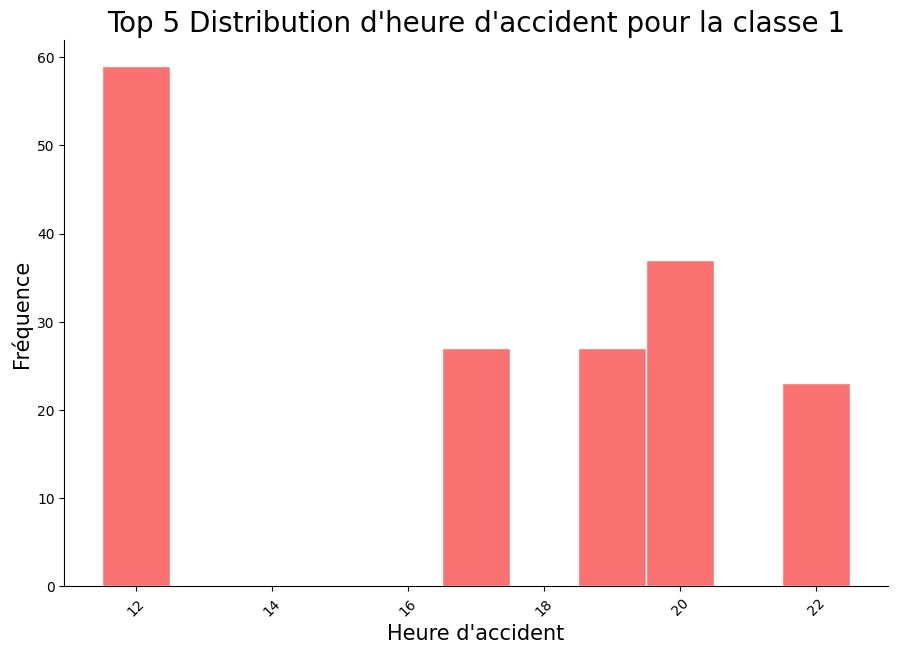

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Model_rfc_eljadida.csv')

# Filter for class 1 and remove NaN values in 'HEU_ACC'
classe_1_df = df[df['Predicted_CLASSE_ISR'] == 1].dropna(subset=['HEU_ACC'])

# Count the frequency of each hour and take the top 5
category_counts = classe_1_df['HEU_ACC'].value_counts().nlargest(5)

# We need to expand the counts into a list where each hour appears as many times as it is counted
# Creating a series where each hour is repeated according to its frequency
hours_expanded = pd.Series(category_counts.index.repeat(category_counts.values))

# Using sns.displot() with sns.histplot() to plot
sns.displot(hours_expanded, discrete=True, color='#fa4343', aspect=1.5, height=6, edgecolor='white')
plt.title("Top 5 Distribution d'heure d'accident pour la classe 1", fontsize=20)
plt.xlabel("Heure d'accident", fontsize=15)
plt.ylabel('Fréquence', fontsize=15)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()




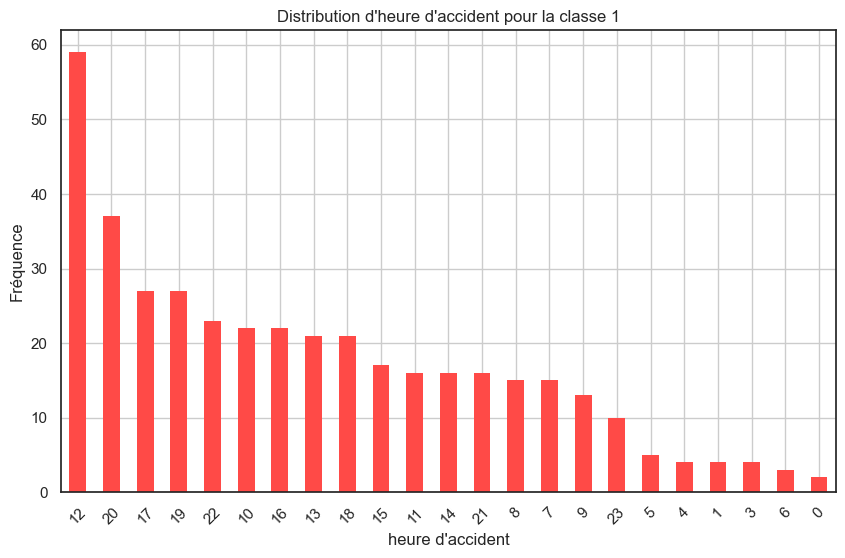

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Model_rfc_eljadida.csv')
classe_1_df = df[df['Predicted_CLASSE_ISR'] == 1]
category_counts = classe_1_df['HEU_ACC'].value_counts()
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='#ff4a47',     edgecolor='none')
plt.title("Distribution d'heure d'accident pour la classe 1")
plt.xlabel("heure d'accident")
plt.ylabel('Fréquence')
plt.rcParams.update({'font.size': 18})  # Ajuster la taille de la police globale
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

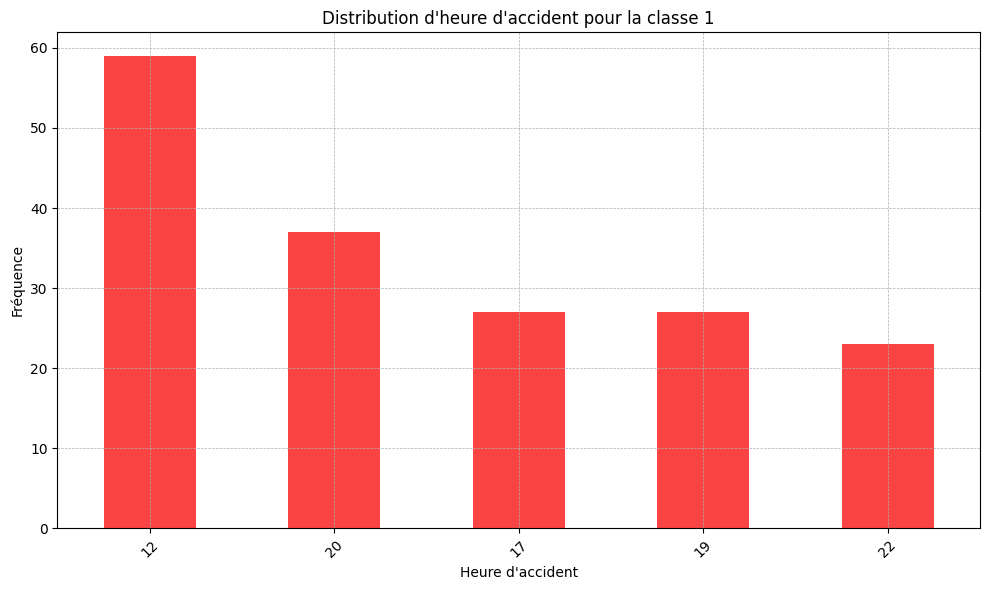

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Model_rfc_eljadida.csv')
classe_1_df = df[df['Predicted_CLASSE_ISR'] == 1]
category_counts = classe_1_df['HEU_ACC'].value_counts().nlargest(5)
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='#fa4343', edgecolor='none')
plt.title("Distribution d'heure d'accident pour la classe 1")
plt.xlabel("Heure d'accident")
plt.ylabel('Fréquence')
plt.xticks(rotation=45) 
plt.grid(True, linestyle='--', linewidth=0.5)  
plt.tight_layout()  
plt.show()


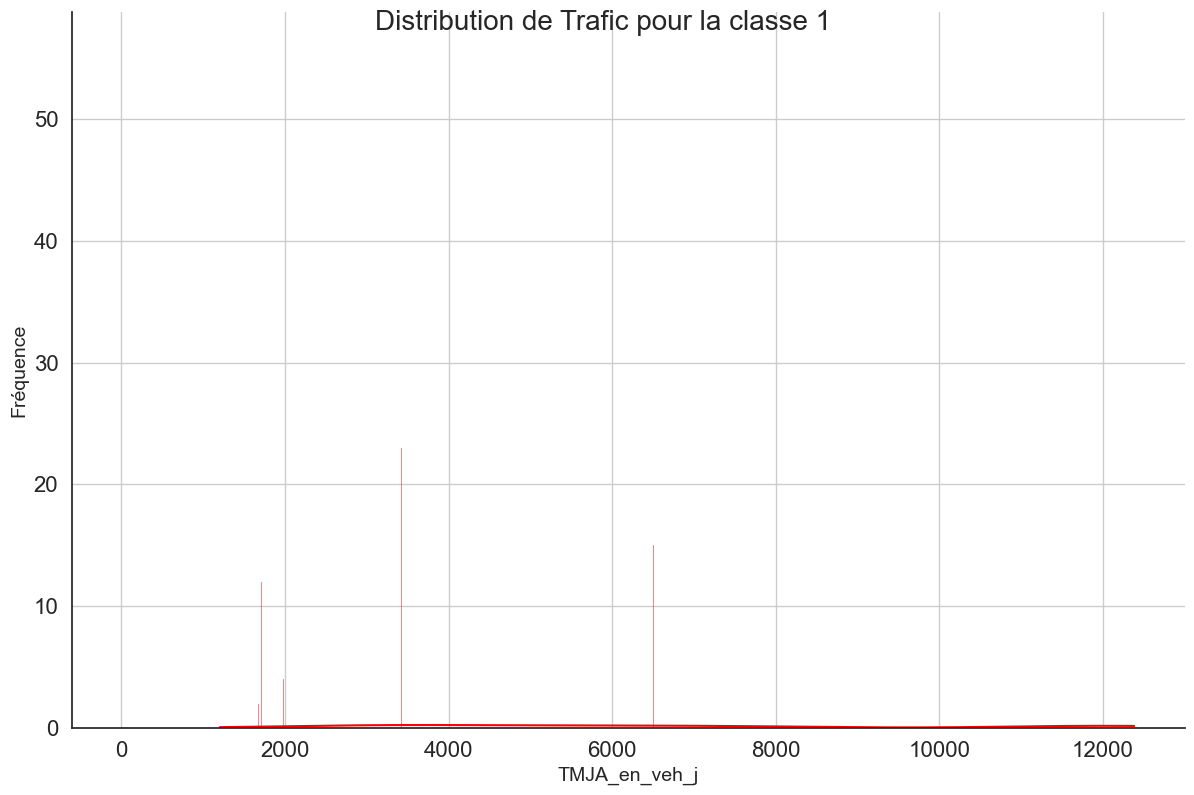

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Model_rfc_eljadida.csv')
classe_1_df = df[df['Predicted_CLASSE_ISR'] == 1]
classe_1_df = classe_1_df.dropna(subset=['TMJA_en_veh_j'])
max_age = classe_1_df['TMJA_en_veh_j'].max()
bin_edges = np.arange(10, max_age + 5, 5)
sns.set_theme(style="white")
plot = sns.displot(classe_1_df['TMJA_en_veh_j'], kde=True, bins=bin_edges, color='red', height=8, aspect=1.5)
plot.set_titles("Distribution de Trafic pour la classe 1")
plot.set_axis_labels('TMJA_en_veh_j', 'Fréquence')
plot.fig.suptitle("Distribution de Trafic pour la classe 1", fontsize=20) 
plt.xlabel('TMJA_en_veh_j', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)  

plt.show()

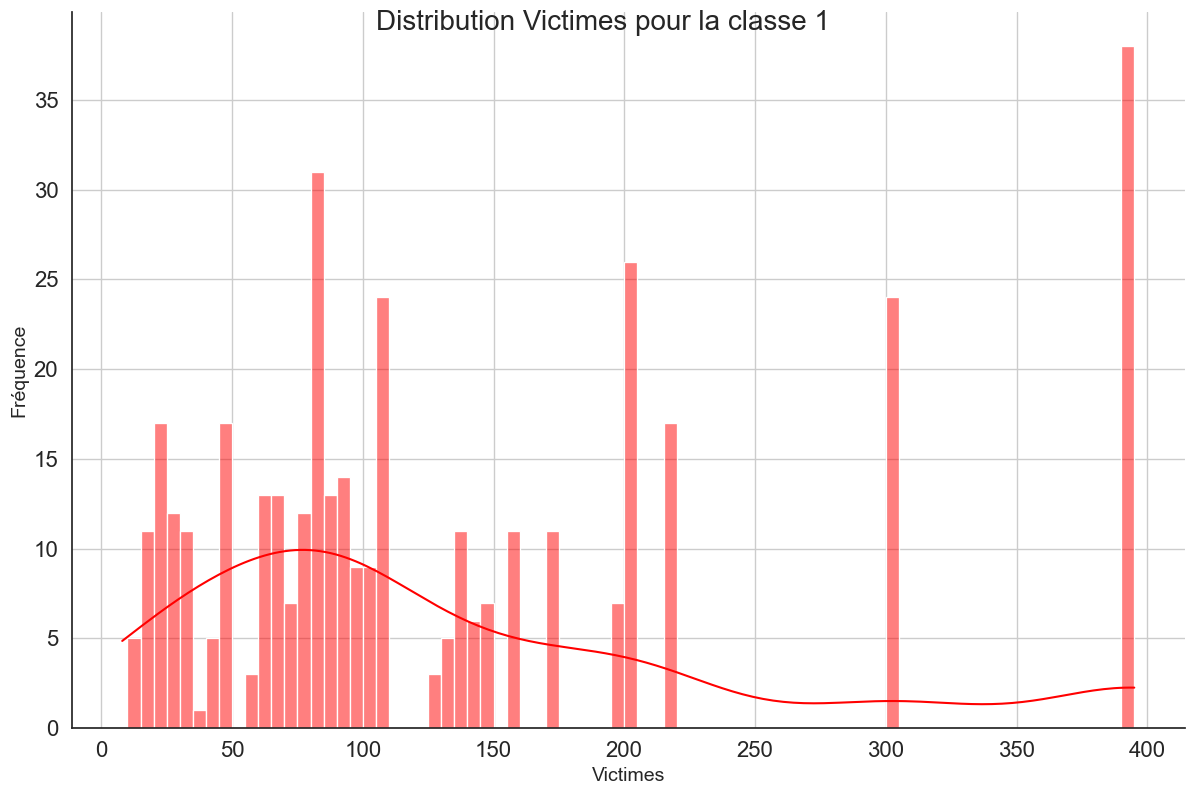

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Model_rfc_eljadida.csv')
classe_1_df = df[df['Predicted_CLASSE_ISR'] == 1]
classe_1_df = classe_1_df.dropna(subset=['Victimes'])
max_age = classe_1_df['Victimes'].max()
bin_edges = np.arange(10, max_age + 5, 5)
sns.set_theme(style="white")
plot = sns.displot(classe_1_df['Victimes'], kde=True, bins=bin_edges, color='red', height=8, aspect=1.5)
plot.set_titles("Distribution des Victimes pour la classe 1")
plot.set_axis_labels('Victimes', 'Fréquence')
plot.fig.suptitle("Distribution Victimes pour la classe 1", fontsize=20) 
plt.xlabel('Victimes', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)  

plt.show()

C:\Users\pc\anaconda3\envs\r-env\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


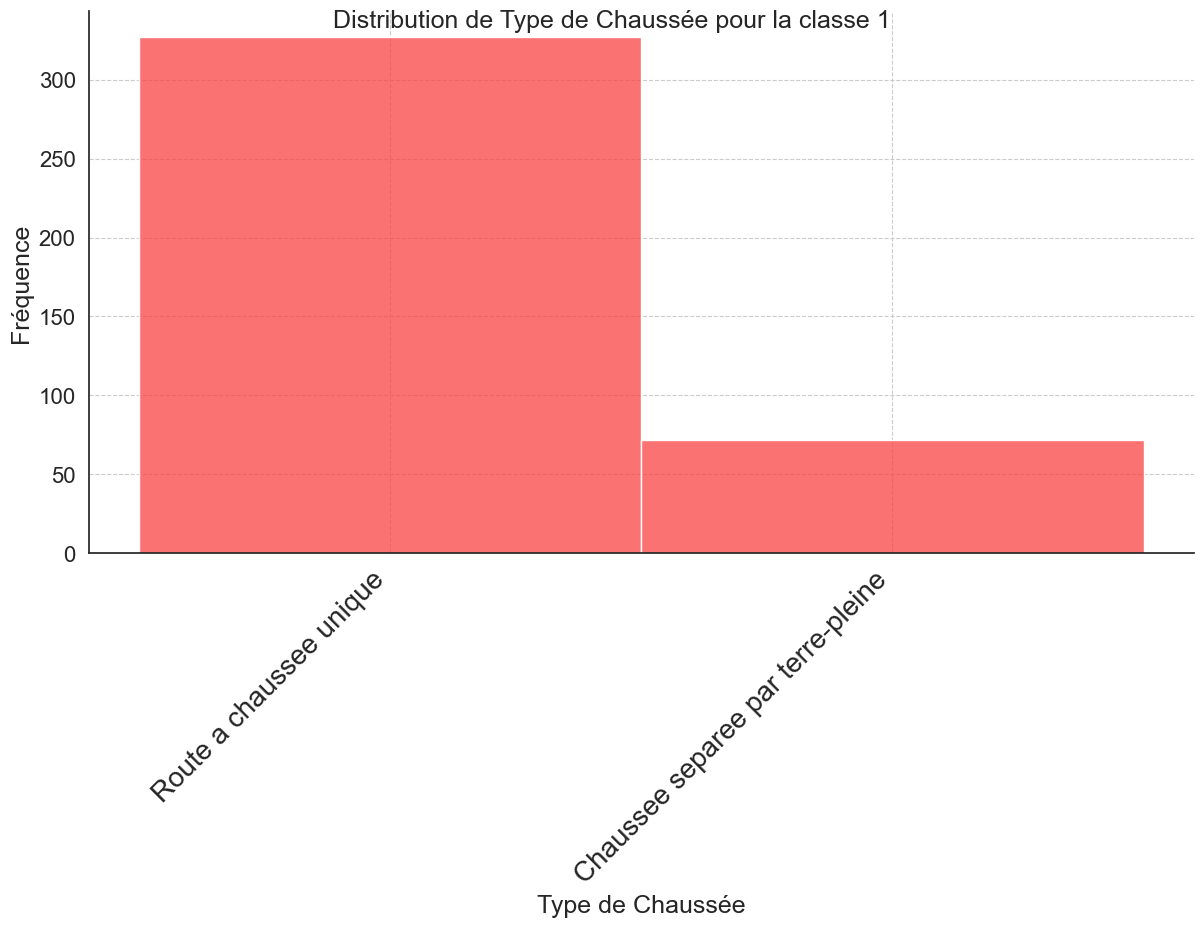

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Model_rfc_eljadida.csv')

# Filter for class 1
classe_1_df = df[df['Predicted_CLASSE_ISR'] == 1]

# Decode categories for 'COD_TYP_CHA'
typ_cha_descriptions = {
    1: 'Route a chaussee unique',
    2: 'Chaussee separee par terre-pleine'
}
classe_1_df['COD_TYP_CHA'] = classe_1_df['COD_TYP_CHA'].map(typ_cha_descriptions)

# Set theme
sns.set_theme(style="white")

# Create displot without KDE for categorical data
plot = sns.displot(data=classe_1_df, x='COD_TYP_CHA', color='#fa4343', height=8, aspect=1.5)
plot.set_xticklabels(rotation=45, horizontalalignment='right')
plot.fig.subplots_adjust(bottom=0.3)  # Adjust the bottom margin to give labels more space
plot.set_titles("Distribution de COD_TYP_CHA pour la classe 1")
plot.set_axis_labels('Type de Chaussée', 'Fréquence', fontsize=18)
plot.fig.suptitle('Distribution de Type de Chaussée pour la classe 1', fontsize=18)
plt.grid(True, which='both', linestyle='--', linewidth=0.8)

plt.xticks(fontsize=20)
plt.yticks(fontsize=16)
plt.show()


C:\Users\pc\anaconda3\envs\r-env\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


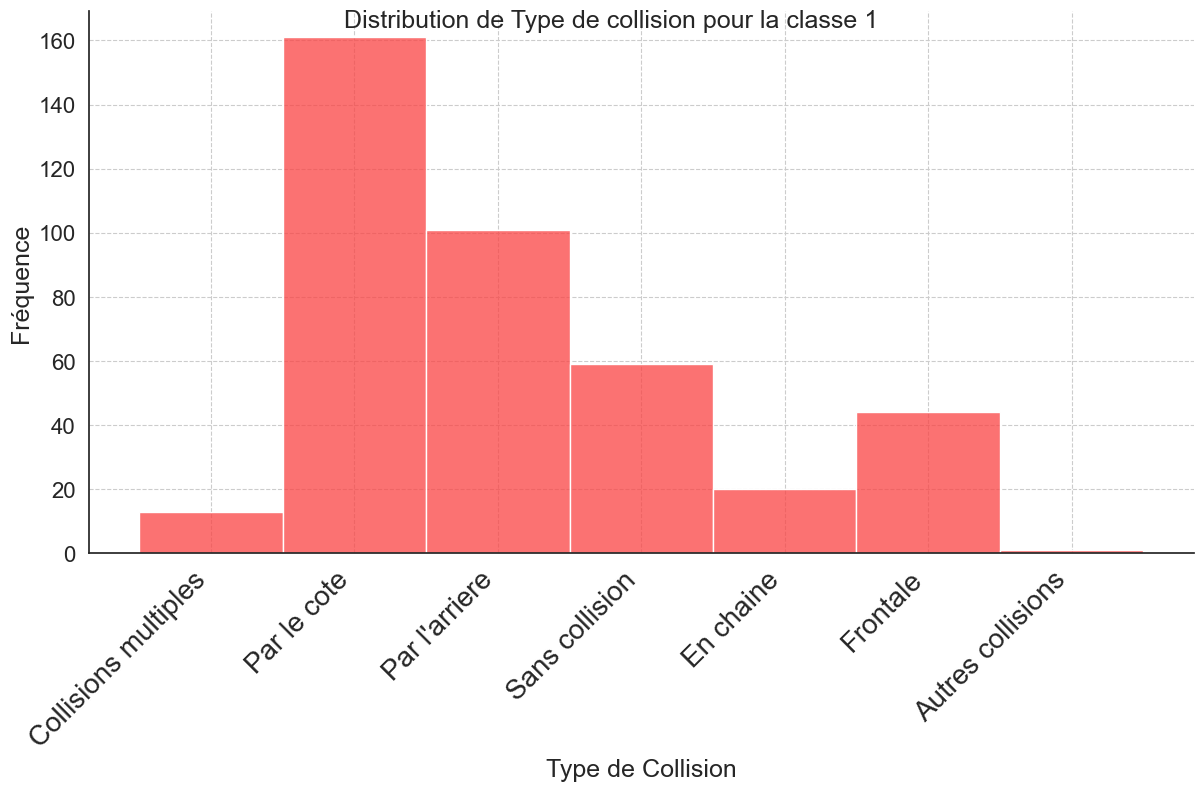

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Model_rfc_eljadida.csv')

# Filter for class 1
classe_1_df = df[df['Predicted_CLASSE_ISR'] == 1]

# Decode categories for 'COD_TYP_COL'
col_descriptions = {
    1: 'Frontale',
    2: 'Par l\'arriere',
    3: 'Par le cote',
    4: 'En chaine',
    5: 'Collisions multiples',
    7: 'Autres collisions',
    8: 'Sans collision'
}
classe_1_df['COD_TYP_COL'] = classe_1_df['COD_TYP_COL'].map(col_descriptions)

# Set theme
sns.set_theme(style="white")

# Create displot without KDE for categorical data
plot = sns.displot(data=classe_1_df, x='COD_TYP_COL', color='#fa4343', height=8, aspect=1.5)
plot.set_xticklabels(rotation=45, horizontalalignment='right')
plot.fig.subplots_adjust(bottom=0.3)  # Adjust the bottom margin to give labels more space
plot.set_titles("Distribution de COD_TYP_COL pour la classe 1")
plot.set_axis_labels('Type de Collision', 'Fréquence', fontsize=18)
plot.fig.suptitle('Distribution de Type de collision pour la classe 1', fontsize=18)
plt.grid(True, which='both', linestyle='--', linewidth=0.8)

plt.xticks(fontsize=20)
plt.yticks(fontsize=16)
plt.show()


C:\Users\pc\anaconda3\envs\r-env\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


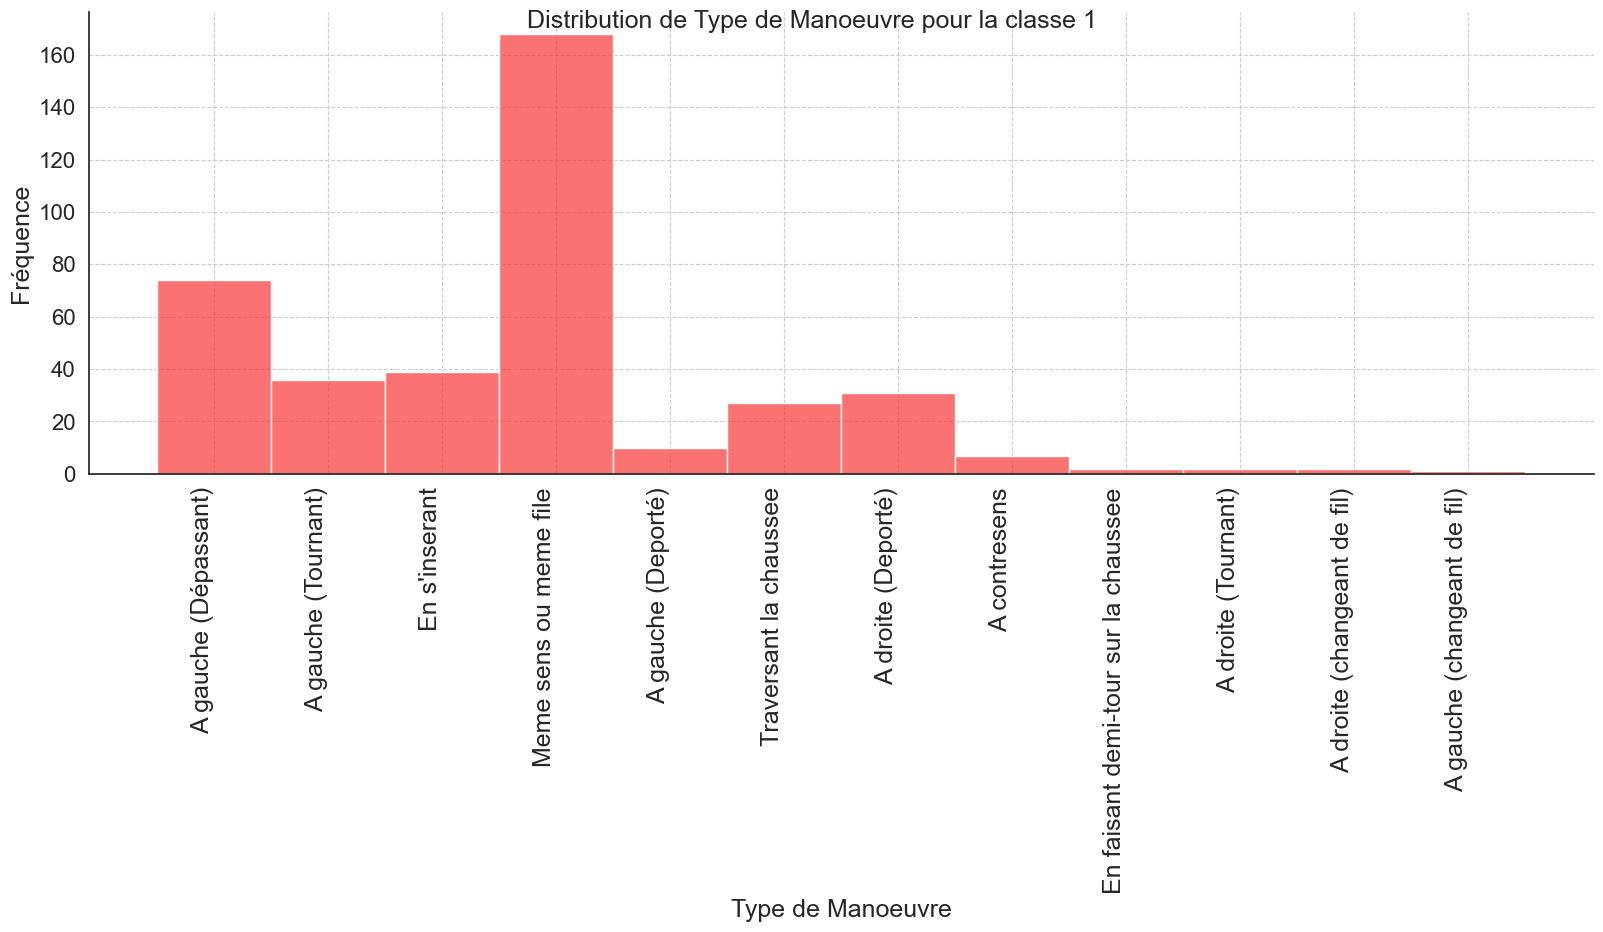

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Model_rfc_eljadida.csv')

# Filter for class 1
classe_1_df = df[df['Predicted_CLASSE_ISR'] == 1]

# Decode categories for 'COD_MAN'
man_descriptions = {
    1: 'Meme sens ou meme file',
    2: 'Entre 2 files',
    3: 'En marche arriere',
    4: 'A contresens',
    5: 'En franchissant le terre-plein central',
    6: 'En s\'inserant',
    7: 'En faisant demi-tour sur la chaussee',
    8: 'A gauche (changeant de fil)',
    9: 'A droite (changeant de fil)',
    10: 'A gauche (Deporté)',
    11: 'A droite (Deporté)',
    12: 'A gauche (Tournant)',
    13: 'A droite (Tournant)',
    14: 'A gauche (Dépassant)',
    15: 'A droite (Dépassant)',
    16: 'Traversant la chaussee',
    17: 'Manoeuvre de stationnement',
    18: 'Manoeuvre d\'evitement',
    19: 'Ouverture de porte',
    20: 'Arrete (hors stationnement)',
    21: 'En stationnement (avec occupants)'
}
classe_1_df['COD_MAN'] = classe_1_df['COD_MAN'].map(man_descriptions)

# Set theme
sns.set_theme(style="white")

# Create displot without KDE for categorical data
plot = sns.displot(data=classe_1_df, x='COD_MAN', color='#fa4343', height=8, aspect=2)
plot.set_xticklabels(rotation=90, horizontalalignment='right')
plot.fig.subplots_adjust(bottom=0.4)  # Adjust the bottom margin to give labels more space
plot.set_titles("Distribution de manoeuve pour la classe 1")
plot.set_axis_labels('Type de Manoeuvre', 'Fréquence', fontsize=18)
plot.fig.suptitle('Distribution de Type de Manoeuvre pour la classe 1', fontsize=18)
plt.grid(True, which='both', linestyle='--', linewidth=0.8)

plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_12100\2509700867.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classe_1_df['COD_MAN'] = classe_1_df['COD_MAN'].map(man_descriptions)


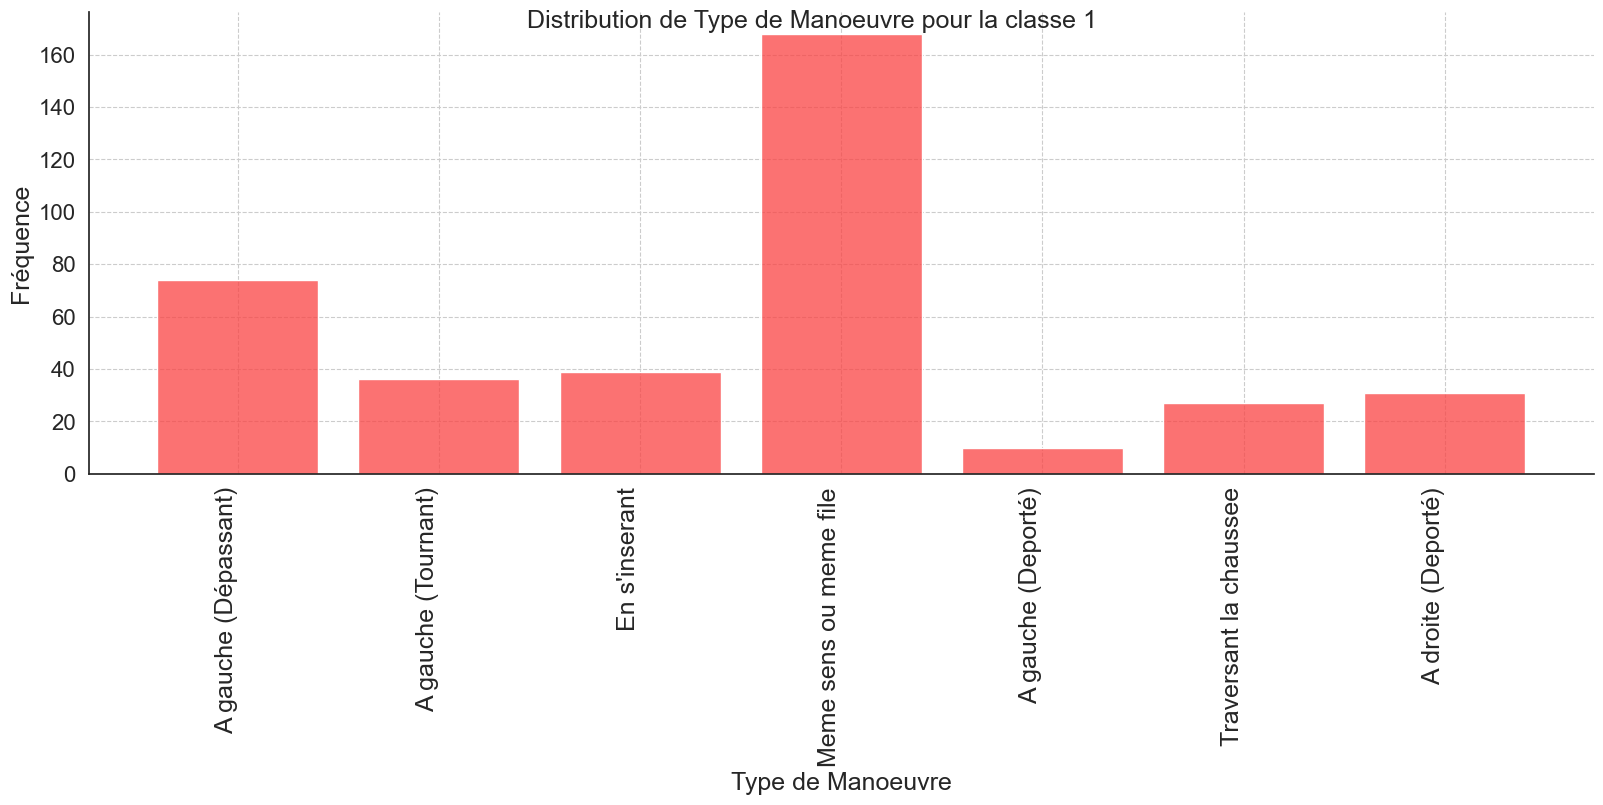

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Model_rfc_eljadida.csv')
classe_1_df = df[df['Predicted_CLASSE_ISR'] == 1]
man_descriptions = {
    1: 'Meme sens ou meme file',
    2: 'Entre 2 files',
    3: 'En marche arriere',
    4: 'A contresens',
    5: 'En franchissant le terre-plein central',
    6: 'En s\'inserant',
    7: 'En faisant demi-tour sur la chaussee',
    8: 'A gauche (changeant de fil)',
    9: 'A droite (changeant de fil)',
    10: 'A gauche (Deporté)',
    11: 'A droite (Deporté)',
    12: 'A gauche (Tournant)',
    13: 'A droite (Tournant)',
    14: 'A gauche (Dépassant)',
    15: 'A droite (Dépassant)',
    16: 'Traversant la chaussee',
    17: 'Manoeuvre de stationnement',
    18: 'Manoeuvre d\'evitement',
    19: 'Ouverture de porte',
    20: 'Arrete (hors stationnement)',
    21: 'En stationnement (avec occupants)'
}
classe_1_df['COD_MAN'] = classe_1_df['COD_MAN'].map(man_descriptions)
top_7 = classe_1_df['COD_MAN'].value_counts().nlargest(7).index
classe_1_df = classe_1_df[classe_1_df['COD_MAN'].isin(top_7)]
sns.set_theme(style="white")
plot = sns.displot(data=classe_1_df, x='COD_MAN', color='#fa4343', height=8, aspect=2, shrink=0.8)
plot.set_xticklabels(rotation=90, horizontalalignment='right')
plot.fig.subplots_adjust(bottom=0.4) 
plot.set_titles("Distribution de manoeuvre pour la classe 1")
plot.set_axis_labels('Type de Manoeuvre', 'Fréquence', fontsize=18)
plot.fig.suptitle('Distribution de Type de Manoeuvre pour la classe 1', fontsize=18)
plt.grid(True, which='both', linestyle='--', linewidth=0.8)

plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()


C:\Users\pc\anaconda3\envs\r-env\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


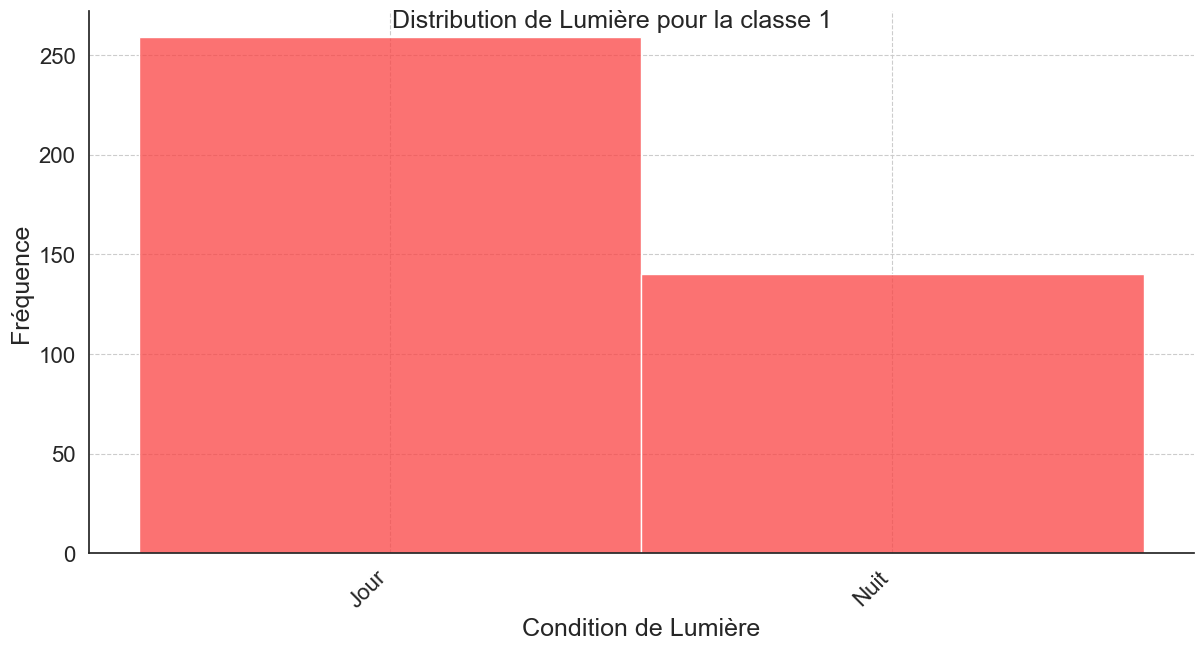

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Model_rfc_eljadida.csv')

# Filter for class 1
classe_1_df = df[df['Predicted_CLASSE_ISR'] == 1]

# Decode categories for 'COD_LUM'
lum_descriptions = {
    1: 'Nuit',
    2: 'Jour',
    9: 'Non précisé'
}
classe_1_df['COD_LUM'] = classe_1_df['COD_LUM'].map(lum_descriptions)

# Set theme
sns.set_theme(style="white")

# Create displot without KDE for categorical data
plot = sns.displot(data=classe_1_df, x='COD_LUM', color='#fa4343', height=8, aspect=1.5)
plot.set_xticklabels(rotation=45, horizontalalignment='right')
plot.fig.subplots_adjust(bottom=0.3)  # Adjust the bottom margin to give labels more space
plot.set_titles("Distribution de COD_LUM pour la classe 1")
plot.set_axis_labels('Condition de Lumière', 'Fréquence', fontsize=18)
plot.fig.suptitle('Distribution de Lumière pour la classe 1', fontsize=18)
plt.grid(True, which='both', linestyle='--', linewidth=0.8)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


C:\Users\pc\anaconda3\envs\r-env\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


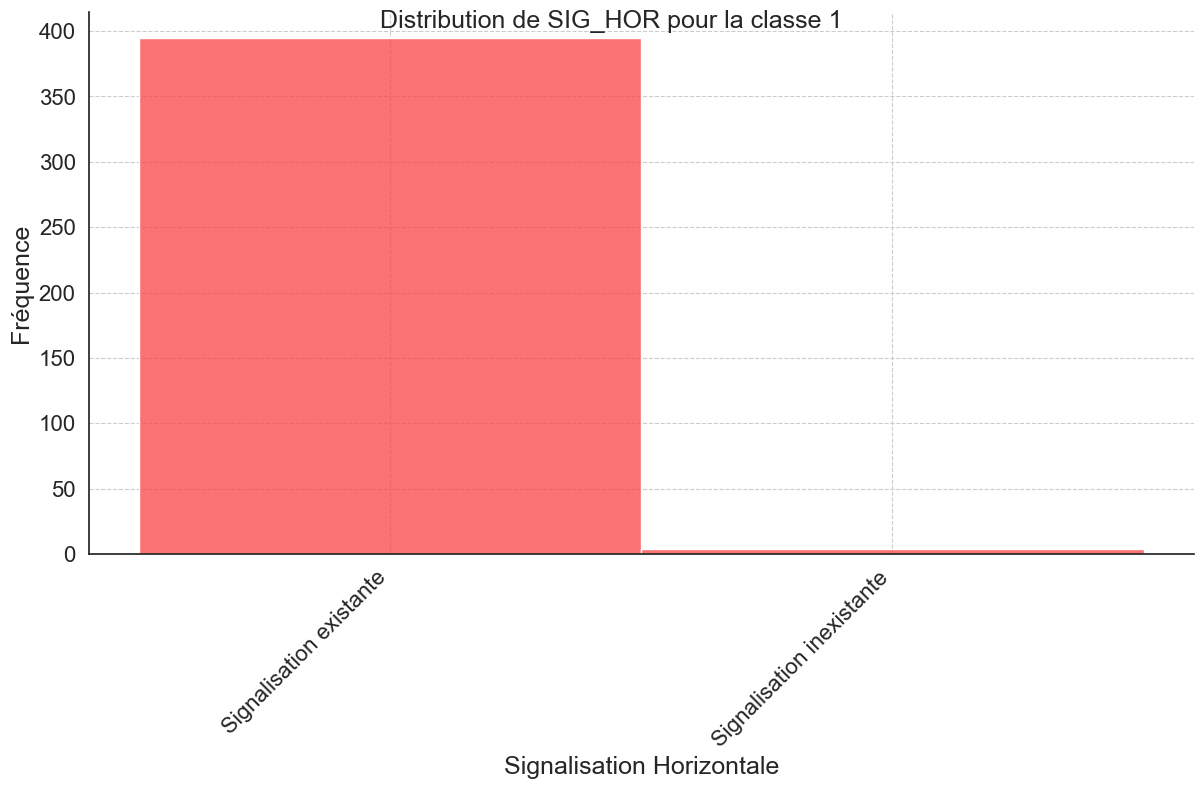

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Model_rfc_eljadida.csv')

# Filter for class 1
classe_1_df = df[df['Predicted_CLASSE_ISR'] == 1]

# Decode categories for 'SIG_HOR'
sig_hor_descriptions = {
    1: 'Signalisation existante',
    2: 'Signalisation inexistante'
}
classe_1_df['SIG_HOR'] = classe_1_df['SIG_HOR'].map(sig_hor_descriptions)

# Set theme
sns.set_theme(style="white")

# Create displot without KDE for categorical data
plot = sns.displot(data=classe_1_df, x='SIG_HOR', color='#fa4343', height=8, aspect=1.5)
plot.set_xticklabels(rotation=45, horizontalalignment='right')
plot.fig.subplots_adjust(bottom=0.3)  # Adjust the bottom margin to give labels more space
plot.set_titles("Distribution de Signalisation Horizontale pour la classe 1")
plot.set_axis_labels('Signalisation Horizontale', 'Fréquence', fontsize=18)
plot.fig.suptitle('Distribution de Signalisation Horizontale pour la classe 1', fontsize=18)
plt.grid(True, which='both', linestyle='--', linewidth=0.8)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


C:\Users\pc\anaconda3\envs\r-env\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


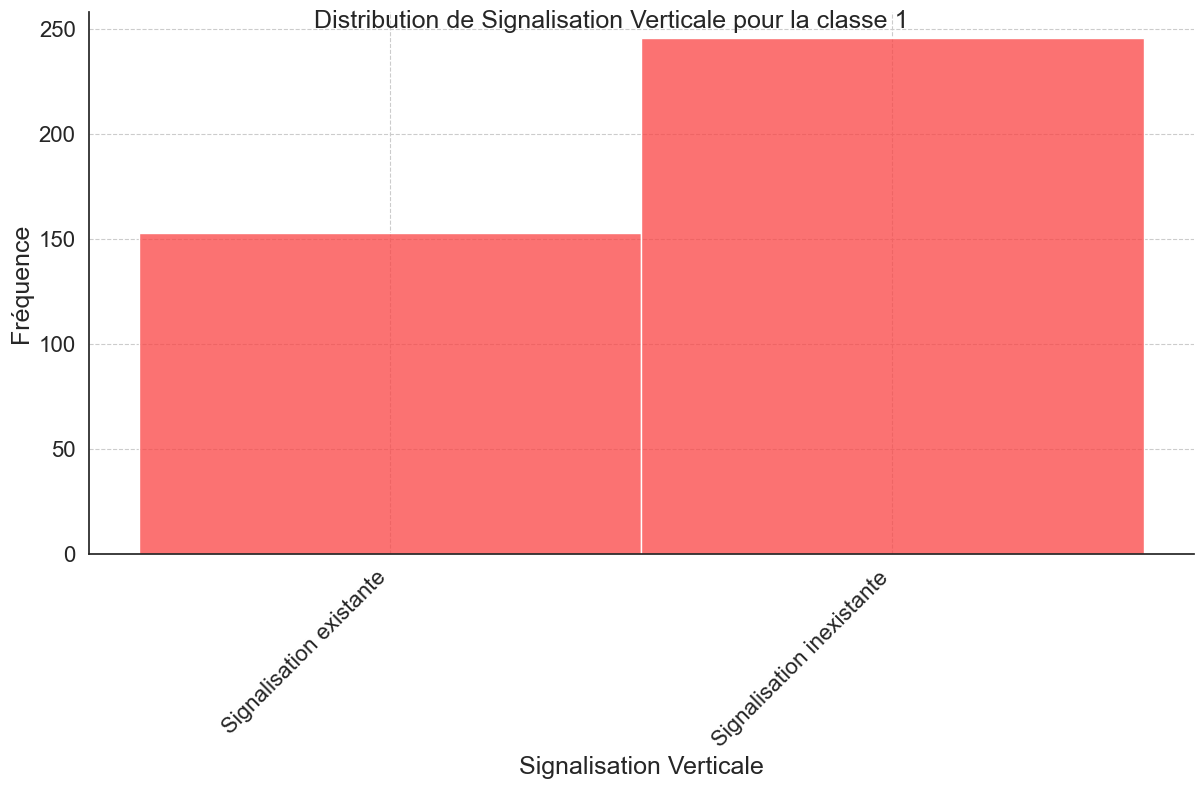

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Model_rfc_eljadida.csv')

# Filter for class 1
classe_1_df = df[df['Predicted_CLASSE_ISR'] == 1]

# Decode categories for 'SIG_HOR'
sig_hor_descriptions = {
    1: 'Signalisation existante',
    2: 'Signalisation inexistante'
}
classe_1_df['SIG_VER'] = classe_1_df['SIG_VER'].map(sig_hor_descriptions)

# Set theme
sns.set_theme(style="white")

# Create displot without KDE for categorical data
plot = sns.displot(data=classe_1_df, x='SIG_VER', color='#fa4343', height=8, aspect=1.5)
plot.set_xticklabels(rotation=45, horizontalalignment='right')
plot.fig.subplots_adjust(bottom=0.3)  # Adjust the bottom margin to give labels more space
plot.set_titles("Distribution de Signalisation Verticale pour la classe 1")
plot.set_axis_labels('Signalisation Verticale', 'Fréquence', fontsize=18)
plot.fig.suptitle('Distribution de Signalisation Verticale pour la classe 1', fontsize=18)
plt.grid(True, which='both', linestyle='--', linewidth=0.8)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_2752\3895025657.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classe_1_df[column] = classe_1_df[column].map(mapping).fillna('Non classifié')


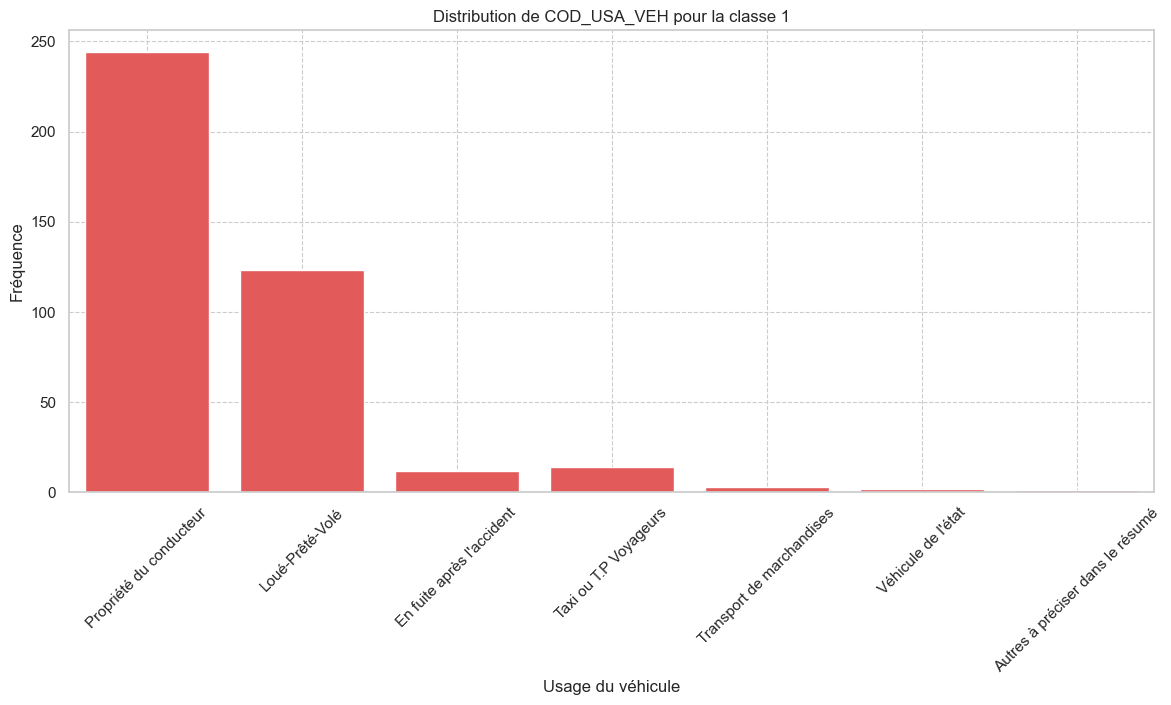

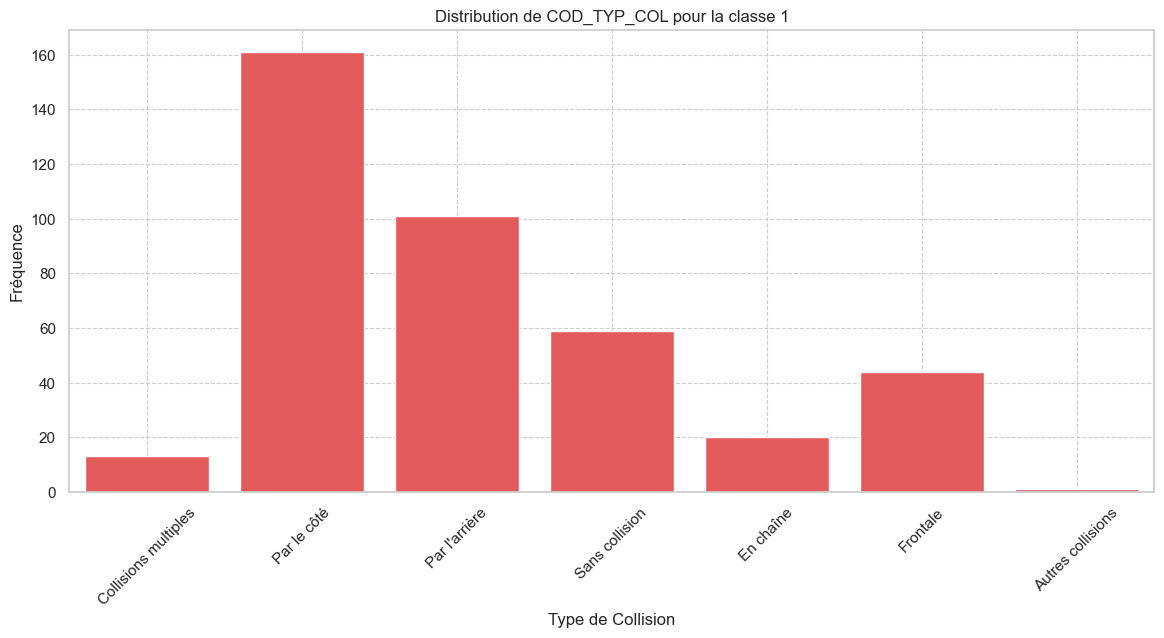

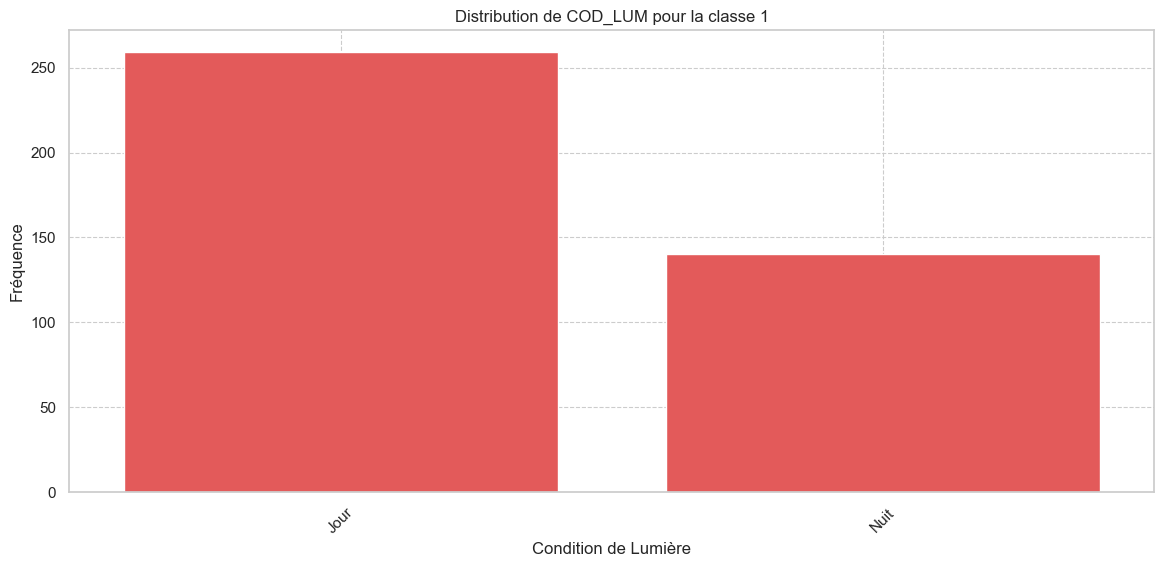

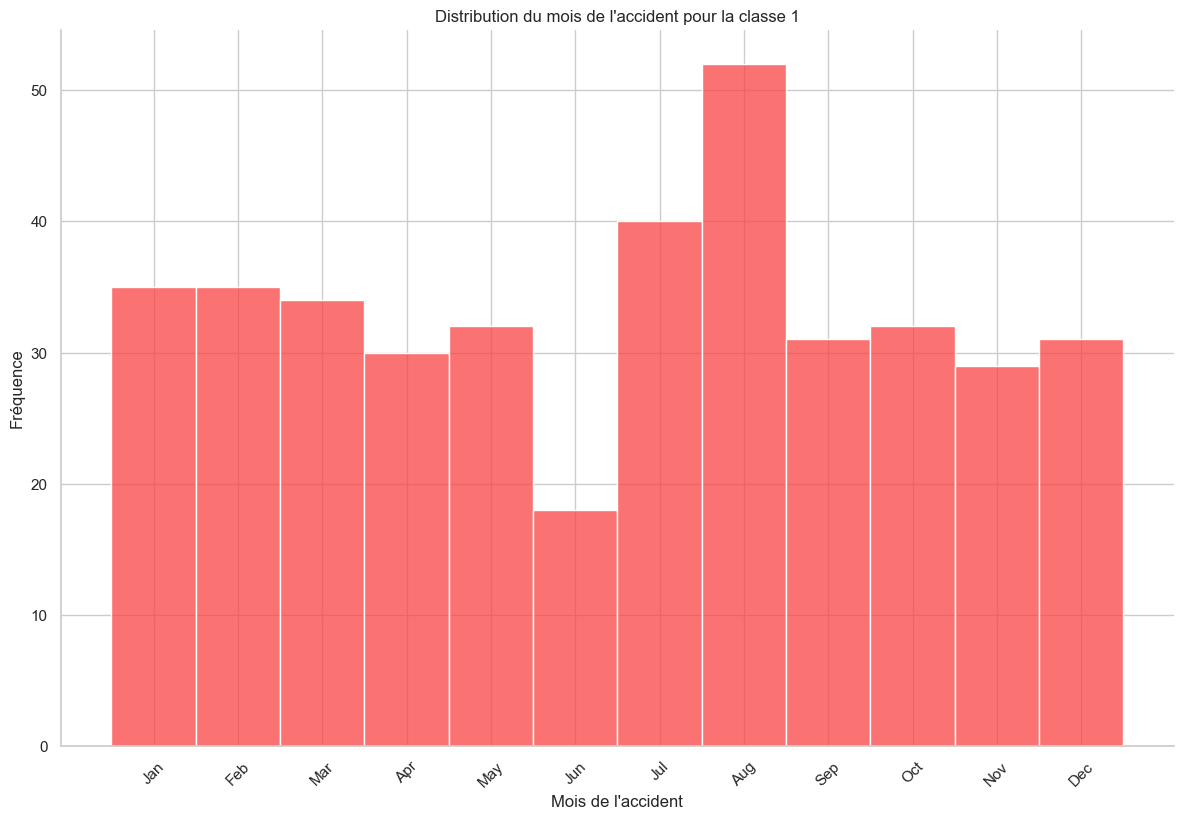

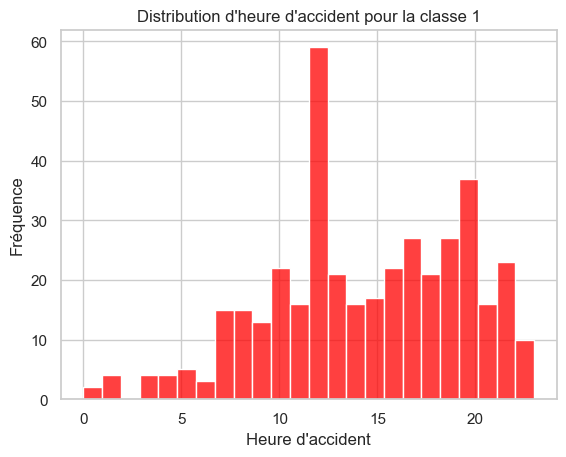

OSError: 'seaborn-white' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Model_rfc_eljadida.csv')
classe_1_df = df[df['Predicted_CLASSE_ISR'] == 1]

mappings = {
    'COD_USA_VEH': {
        0: 'Propriété du conducteur',
        1: 'Taxi ou T.P Voyageurs',
        2: 'Transport de marchandises',
        3: 'Véhicule de l\'état',
        4: 'Loué-Prêté-Volé',
        5: 'En fuite après l\'accident',
        9: 'Autres à préciser dans le résumé'
    },
    'COD_TYP_COL': {
        1: 'Frontale',
        2: 'Par l\'arrière',
        3: 'Par le côté',
        4: 'En chaîne',
        5: 'Collisions multiples',
        7: 'Autres collisions',
        8: 'Sans collision'
    },
    'COD_LUM': {
        1: 'Nuit',
        2: 'Jour',
        9: 'Non précisé'
    }
}

for column, mapping in mappings.items():
    classe_1_df[column] = classe_1_df[column].map(mapping).fillna('Non classifié')

def create_plot(data, column, title, xlabel, ylabel='Fréquence'):
    plt.figure(figsize=(14, 6))
    sns.set_theme(style="whitegrid")
    sns.countplot(data=data, x=column, color='#fa4343')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.grid(True, which='both', linestyle='--', linewidth=0.8)
    plt.show()

create_plot(classe_1_df, 'COD_USA_VEH', "Distribution de COD_USA_VEH pour la classe 1", 'Usage du véhicule')
create_plot(classe_1_df, 'COD_TYP_COL', "Distribution de COD_TYP_COL pour la classe 1", 'Type de Collision')
create_plot(classe_1_df, 'COD_LUM', "Distribution de COD_LUM pour la classe 1", 'Condition de Lumière')

bin_edges = np.arange(0.5, 13.5, 1)
sns.displot(classe_1_df, x='MOIS_ACC', bins=bin_edges, color='#fa4343', height=8, aspect=1.5)
plt.title("Distribution du mois de l'accident pour la classe 1")
plt.xlabel('Mois de l\'accident')
plt.ylabel('Fréquence')
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

sns.histplot(classe_1_df['HEU_ACC'].dropna(), bins=24, color='red', kde=False)
plt.title("Distribution d'heure d'accident pour la classe 1")
plt.xlabel("Heure d'accident")
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

category_counts = classe_1_df['age_veh'].value_counts()
plt.style.use('seaborn-white')
plt.figure(figsize=(14, 6))
category_counts.plot(kind='bar', color='#ff4a47', edgecolor='none')
plt.title("Distribution d'age de vehicule impliqué pour la classe 1")
plt.xlabel('age_veh')
plt.ylabel('Fréquence')
plt.rcParams.update({'font.size': 18})
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.8)
plt.show()